In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from utils import plot_AUC,plot_signals_youden, plot_signals_roc01, summarize_thresholds, summarize_thresholds2, summarize_sen_spe
from statsmodels.stats.multitest import multipletests

In [2]:
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]

In [3]:
data

Name         Sequence AG876 B95-8  GD1  Cao Raji P3HR-1  \
1254  00_EBV_EBNA1_0415  FEYHQEGGPDGEPDM     x   NaN  NaN  NaN  NaN    NaN   
1255  00_EBV_EBNA1_0415  FEYHQEGGPDGEPDV   NaN     x  NaN  NaN  NaN    NaN   
1256  00_EBV_EBNA1_0419  QEGGPDGEPDMPPGA     x   NaN  NaN  NaN  NaN    NaN   
1257  00_EBV_EBNA1_0419  QEGGPDGEPDVPPGA   NaN     x    x  NaN  NaN    NaN   
1258  00_EBV_EBNA1_0423  PDGEPDMPPGAIEQG     x   NaN  NaN  NaN  NaN    NaN   
1259  00_EBV_EBNA1_0423  PDGEPDVPPGAIEQG   NaN     x    x  NaN  NaN    NaN   
1260  00_EBV_EBNA1_0427  PDVPPGAIEQGPTDD   NaN   NaN    x  NaN  NaN    NaN   
1261  00_EBV_EBNA1_0430  PPGAIEQGPADDPGE     x     x  NaN  NaN  NaN    NaN   
1262  00_EBV_EBNA1_0431  PGAIEQGPTDDPGEG   NaN   NaN    x  NaN  NaN    NaN   
1263  00_EBV_EBNA1_0434  IEQGPADDPGEGPST     x     x  NaN  NaN  NaN    NaN   
1264  00_EBV_EBNA1_0435  EQGPTDDPGEGPSTG   NaN   NaN    x  NaN  NaN    NaN   
1265  00_EBV_EBNA1_0440  DDPGEGPSTGPRGQG     x     x    x  NaN  NaN    NaN   
1266  00_EBV_EBNA1_0444  EGPSTGPRGQGDGGR     x     x    x  NaN  NaN    NaN   
1267  00_EBV_EBNA1_0448  TGPRGQGDGGRRKKG     x     x    x  NaN  NaN    NaN   
1268  00_EBV_EBNA1_0452  GQGDGGRRKKGGWYG     x   NaN  NaN  NaN  NaN    NaN   
1269  00_EBV_EBNA1_0452  GQGDGGRRKKGGWFG   NaN     x    x  NaN  NaN    NaN   

       HEALTHY_01    HEALTHY_02    HEALTHY_03    HEALTHY_04    HEALTHY_05  \
1254   951.666667   9077.666667   1175.333333   3059.333333  60380.666670   
1255  1044.666667  14721.333330   1443.000000   3295.000000  63598.000000   
1256   918.333333   2326.000000  17546.333330   1047.000000  60361.000000   
1257   903.666667   3251.000000  19706.000000   1072.333333   1361.000000   
1258   866.666667    890.333333  18841.000000  13558.000000  59261.666670   
1259  1539.000000    898.000000  21139.500000  54913.000000  61768.000000   
1260  1203.000000    919.333333   2266.000000  43918.000000  55779.333330   
1261   899.000000    986.000000   1061.333333  24001.000000   1245.333333   
1262   866.000000    931.666667   1092.000000   1408.000000   1203.666667   
1263   853.666667    918.333333   2589.666667  18582.666670  47523.666670   
1264   863.333333    954.666667   1899.000000  12412.333330  61093.666670   
1265   869.333333    991.333333   2727.666667  16001.333330  48623.666670   
1266   872.666667   1289.666667   1023.000000   2234.000000   1078.000000   
1267   835.333333    825.666667   1058.000000   1163.333333   1193.666667   
1268   911.666667   1213.333333   1520.000000   1410.333333   2157.000000   
1269   997.666667   1225.666667   1803.000000   1545.333333   2401.000000   

        HEALTHY_06    HEALTHY_07    HEALTHY_08   HEALTHY_09   HEALTHY_10  \
1254   1168.000000   1502.333333    973.000000  1155.000000   818.666667   
1255   1180.000000   1790.000000   1204.666667  1250.333333   864.000000   
1256   1031.000000   5741.500000    932.666667  1471.333333  1197.500000   
1257   1028.000000   1131.500000   1024.000000  1422.000000  1054.000000   
1258   6590.500000  18431.000000   9295.333333  1715.333333  1889.666667   
1259   2691.000000   2309.000000  10094.000000  2433.000000  1170.000000   
1260  16991.666670   2770.000000  16312.666670  1538.333333  1117.666667   
1261   6120.000000   1158.666667   7854.333333  1398.333333   962.333333   
1262   1536.666667    952.000000   2461.333333  1387.666667   849.333333   
1263   1147.333333   1856.666667   5125.333333  1186.666667   856.000000   
1264   1181.000000   1659.666667   9415.666667  1081.333333   831.333333   
1265   1185.333333   1499.666667  56953.333330  2134.333333  1312.666667   
1266   1050.666667   1083.333333  63687.666670  1636.666667  1206.000000   
1267   1089.666667   1032.666667   1005.666667  1374.333333   807.666667   
1268   1438.666667   1984.000000   2049.666667  1898.666667  1918.333333   
1269   1419.333333   1927.666667   2060.666667  1995.666667  1974.000000   

        HEALTHY_11   HEALTHY_12   HEALTHY_13   HEALTHY_14   HEALTHY_15  \
1254    967.333

# Signals

In [4]:
smr, all_lower_bounds, all_p_values, auc, gini, x_plot, y_plot, youden, roc01  = summarize_df(data, 8, 58)

**Chi-squared**

In [5]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

ID  minimum p-value  lower bound  upper bound
0               EBNA1_0415 (AG876)         0.004892     1001.000     1003.000
1               EBNA1_0415 (B95-8)         0.015897      939.000      963.333
2               EBNA1_0419 (AG876)         0.017142      780.667      783.667
3          EBNA1_0419 (B95-8, GD1)         0.004892      985.000      999.333
4               EBNA1_0423 (AG876)         0.013764      821.000      828.500
5          EBNA1_0423 (B95-8, GD1)         0.002855      905.000      913.000
6                 EBNA1_0427 (GD1)         0.027957      928.667      949.333
7        EBNA1_0430 (AG876, B95-8)         0.016304      873.667      889.333
8                 EBNA1_0431 (GD1)         0.000261      933.000      933.667
9        EBNA1_0434 (AG876, B95-8)         0.000635      923.333      929.333
10                EBNA1_0435 (GD1)         0.000863      819.667      824.000
11  EBNA1_0440 (AG876, B95-8, GD1)         0.037063      805.000      830.667
12  EBNA1_0444 (AG876, B95-8, GD1)         0.016859      844.333      850.333
13  EBNA1_0448 (AG876, B95-8, GD1)         0.000150      841.667      842.000
14              EBNA1_0452 (AG876)         0.021620     2270.000     2301.000
15         EBNA1_0452 (B95-8, GD1)         0.020966     1269.667     1284.333

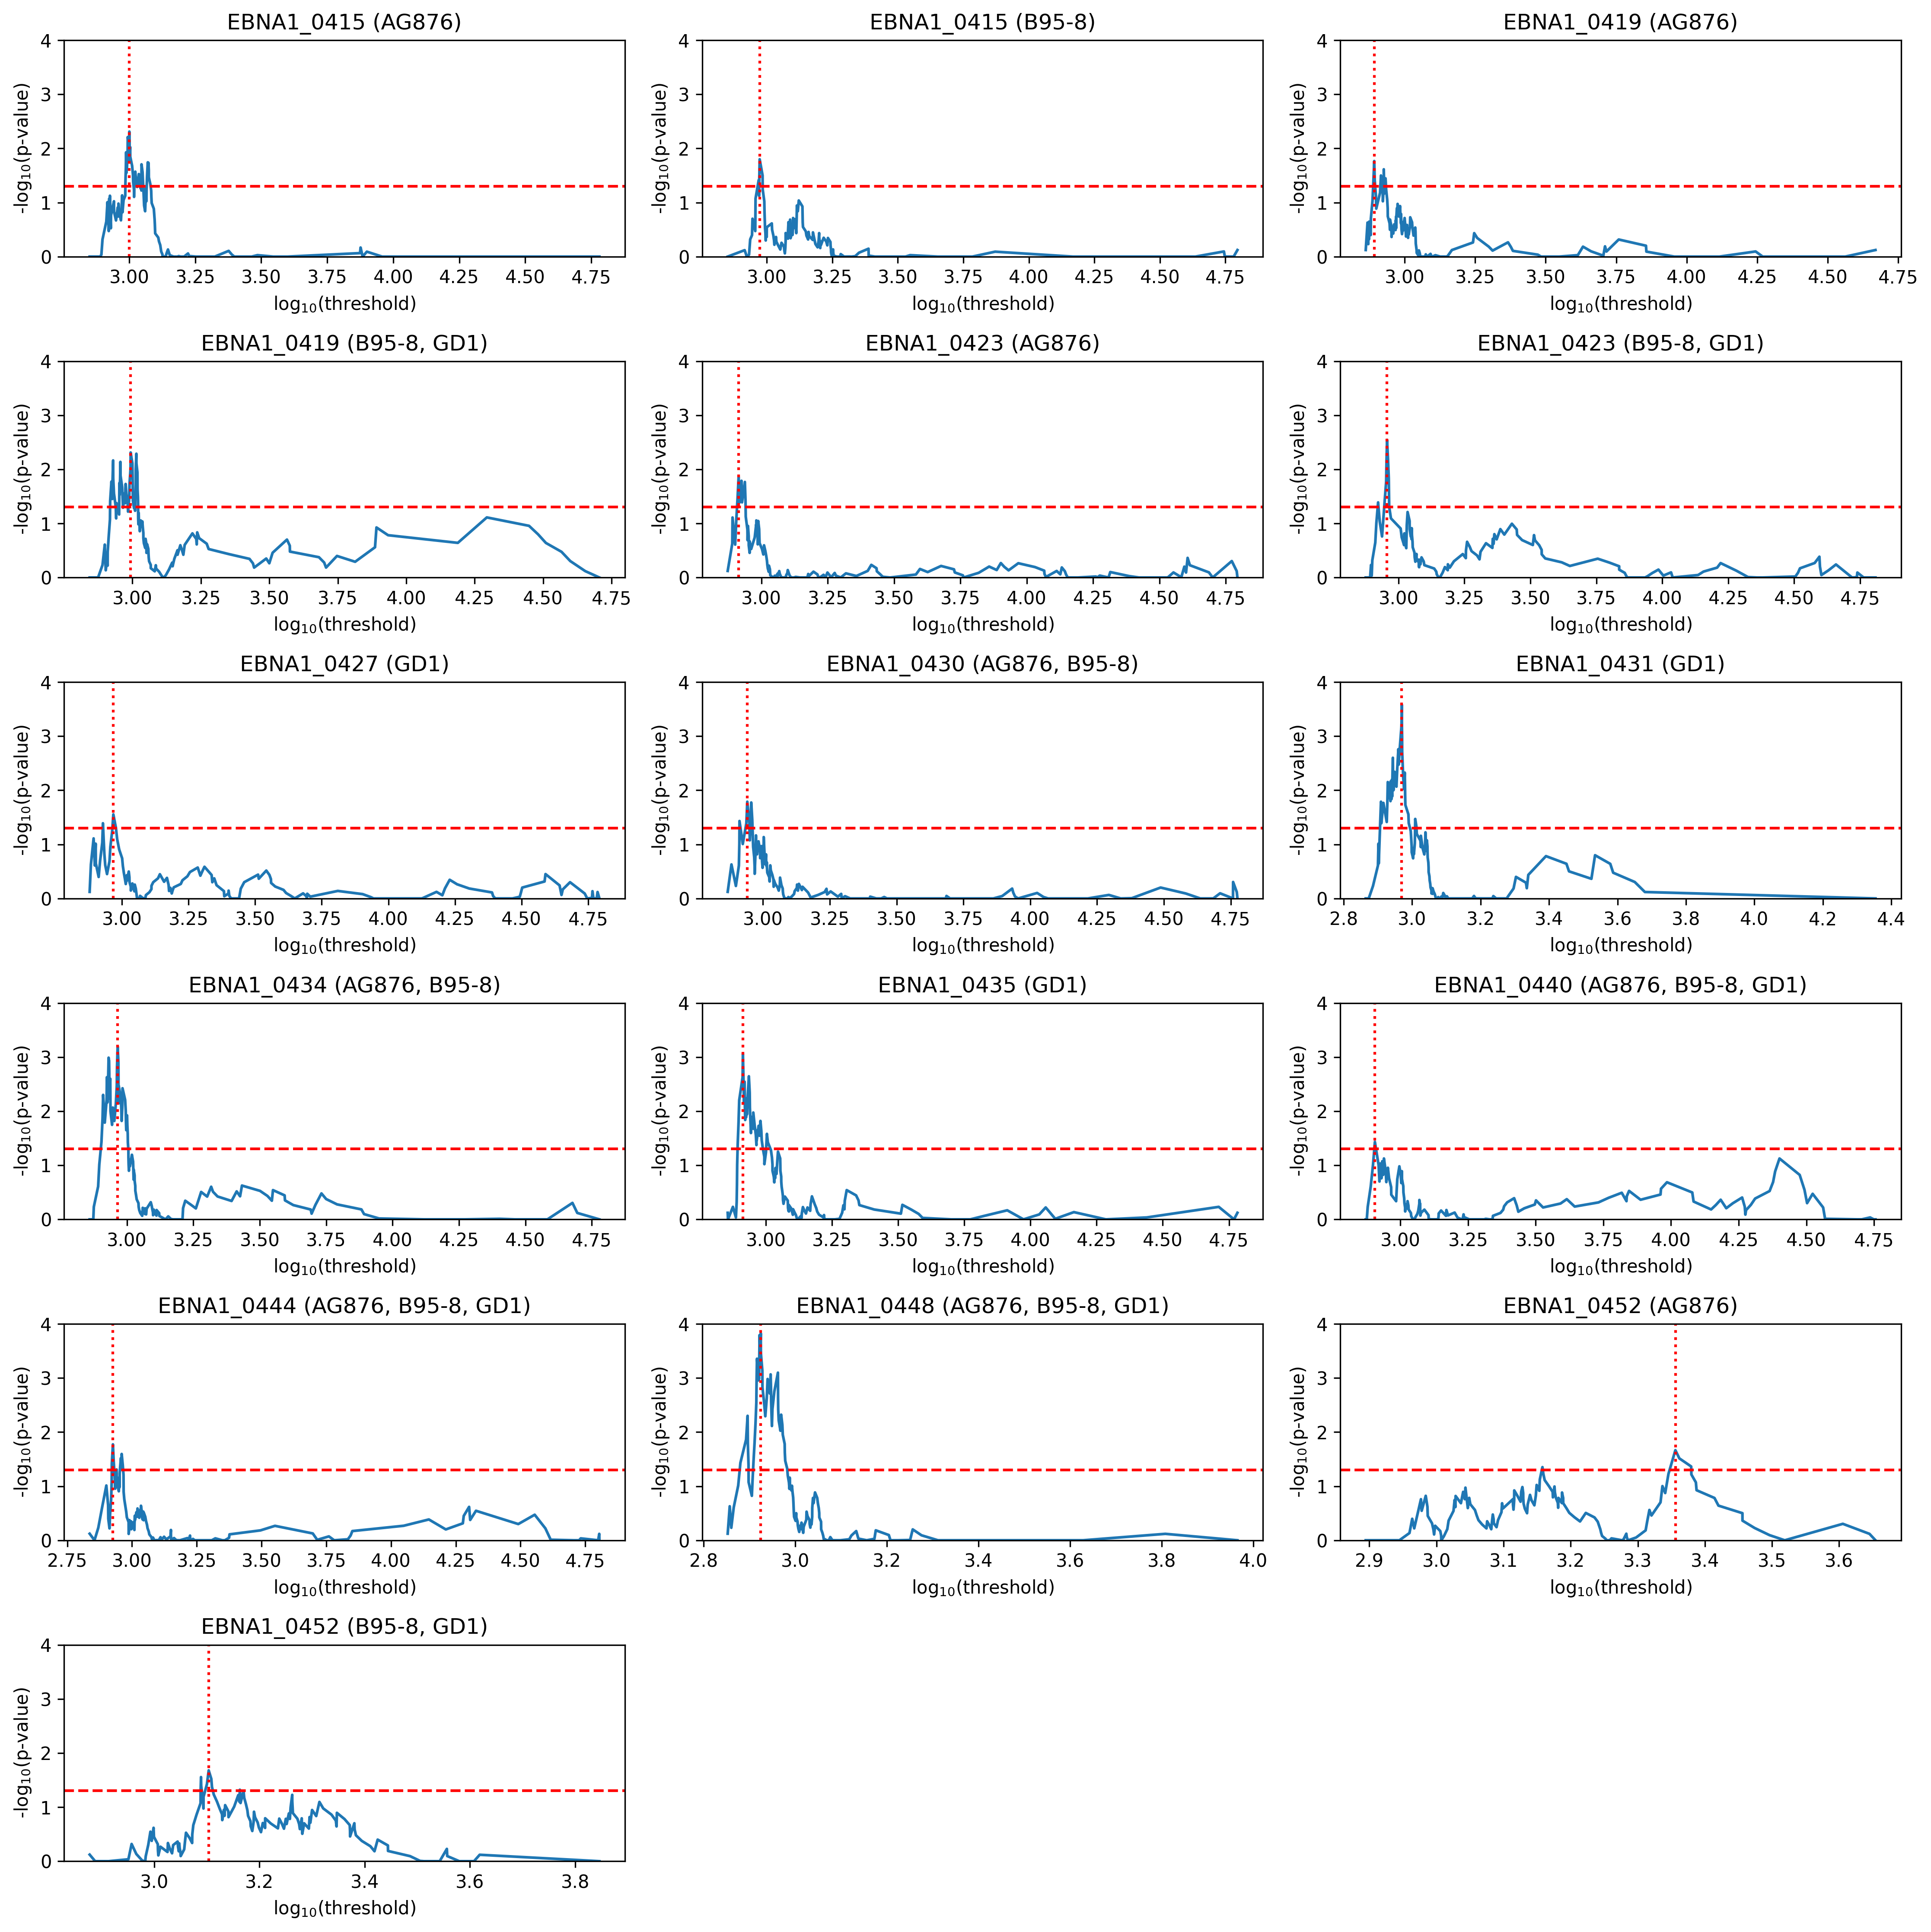

In [6]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**ROC with AUC**

In [7]:
smr_roc = smr[['name', 'AUC_total', 'min_roc01', 'max_youden', 'min_dist']]
smr_roc.columns = ['ID', 'AUC', 'ROC01', "Youden's J-statistic", '|Sen-Spe|']
smr_roc.iloc[:, 1:] = np.round(smr_roc.iloc[:, 1:], 3)
smr_roc

ID    AUC  ROC01  Youden's J-statistic  \
0               EBNA1_0415 (AG876)  0.602  0.552                 0.243   
1               EBNA1_0415 (B95-8)  0.562  0.594                 0.163   
2               EBNA1_0419 (AG876)  0.569  0.619                 0.153   
3          EBNA1_0419 (B95-8, GD1)  0.618  0.535                 0.256   
4               EBNA1_0423 (AG876)  0.542  0.679                 0.137   
5          EBNA1_0423 (B95-8, GD1)  0.561  0.620                 0.177   
6                 EBNA1_0427 (GD1)  0.513  0.669                 0.144   
7        EBNA1_0430 (AG876, B95-8)  0.542  0.648                 0.153   
8                 EBNA1_0431 (GD1)  0.594  0.582                 0.280   
9        EBNA1_0434 (AG876, B95-8)  0.602  0.591                 0.260   
10                EBNA1_0435 (GD1)  0.589  0.583                 0.213   
11  EBNA1_0440 (AG876, B95-8, GD1)  0.508  0.670                 0.106   
12  EBNA1_0444 (AG876, B95-8, GD1)  0.539  0.628                 0.170   
13  EBNA1_0448 (AG876, B95-8, GD1)  0.612  0.556                 0.284   
14              EBNA1_0452 (AG876)  0.584  0.585                 0.191   
15         EBNA1_0452 (B95-8, GD1)  0.600  0.574                 0.208   

    |Sen-Spe|  
0       0.243  
1       0.163  
2       0.153  
3       0.256  
4       0.137  
5       0.177  
6       0.144  
7       0.153  
8       0.280  
9       0.260  
10      0.213  
11      0.106  
12      0.170  
13      0.284  
14      0.191  
15      0.208

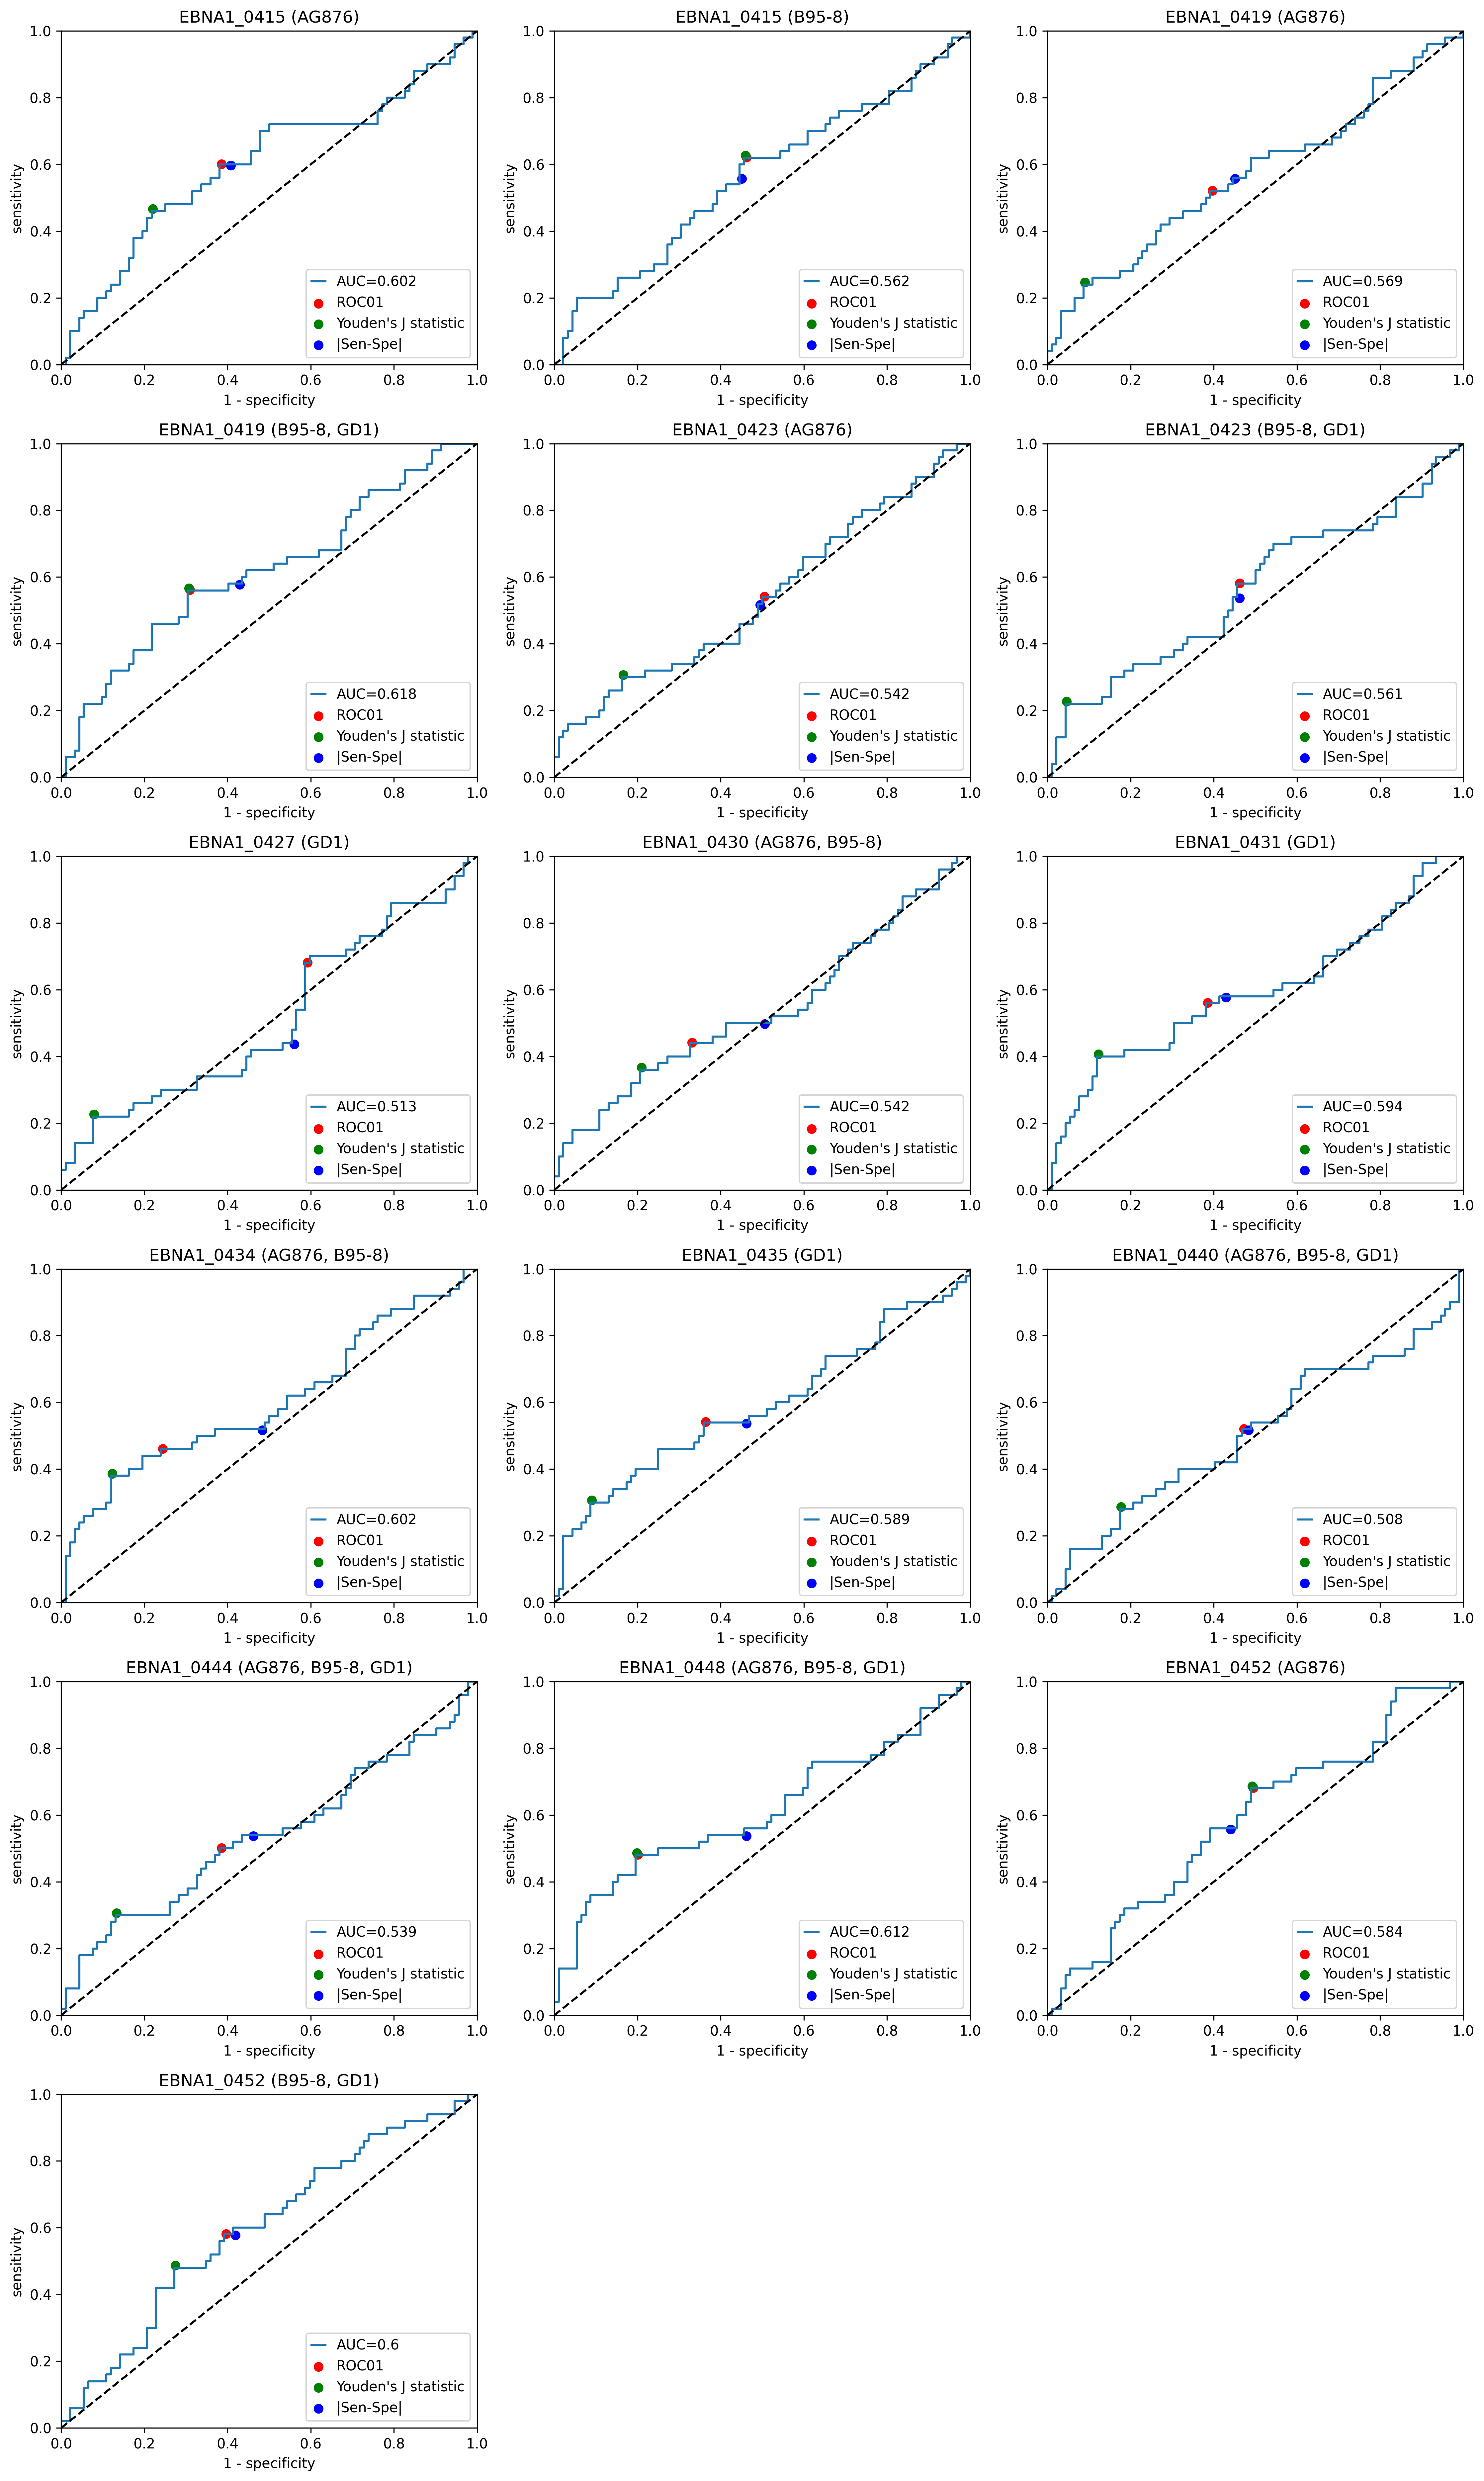

In [8]:
plot_AUC(smr, x_plot, y_plot)

**Youden**

In [9]:
smr_youden = smr[['name', 'max_youden', 'youden_lower_bound', 'youden_upper_bound']]
smr_youden.columns = ['ID', "Youden's J statistic", 'lower bound', 'upper bound']
smr_youden.iloc[:, 1:] = np.round(smr_youden.iloc[:, 1:], 3)
smr_youden

ID  Youden's J statistic  lower bound  \
0               EBNA1_0415 (AG876)                 0.243     1001.000   
1               EBNA1_0415 (B95-8)                 0.163     1324.000   
2               EBNA1_0419 (AG876)                 0.153      844.000   
3          EBNA1_0419 (B95-8, GD1)                 0.256     1033.333   
4               EBNA1_0423 (AG876)                 0.137      973.000   
5          EBNA1_0423 (B95-8, GD1)                 0.177      905.000   
6                 EBNA1_0427 (GD1)                 0.144      928.667   
7        EBNA1_0430 (AG876, B95-8)                 0.153     1006.667   
8                 EBNA1_0431 (GD1)                 0.280      933.000   
9        EBNA1_0434 (AG876, B95-8)                 0.260      923.333   
10                EBNA1_0435 (GD1)                 0.213      863.333   
11  EBNA1_0440 (AG876, B95-8, GD1)                 0.106     9660.000   
12  EBNA1_0444 (AG876, B95-8, GD1)                 0.170      912.667   
13  EBNA1_0448 (AG876, B95-8, GD1)                 0.284      917.333   
14              EBNA1_0452 (AG876)                 0.191     1438.667   
15         EBNA1_0452 (B95-8, GD1)                 0.208     1269.667   

    upper bound  
0      1003.000  
1      1367.000  
2       845.667  
3      1034.000  
4       981.000  
5       913.000  
6       949.333  
7      1009.667  
8       933.667  
9       929.333  
10      869.667  
11    11982.000  
12      921.333  
13      917.667  
14     1443.000  
15     1284.333

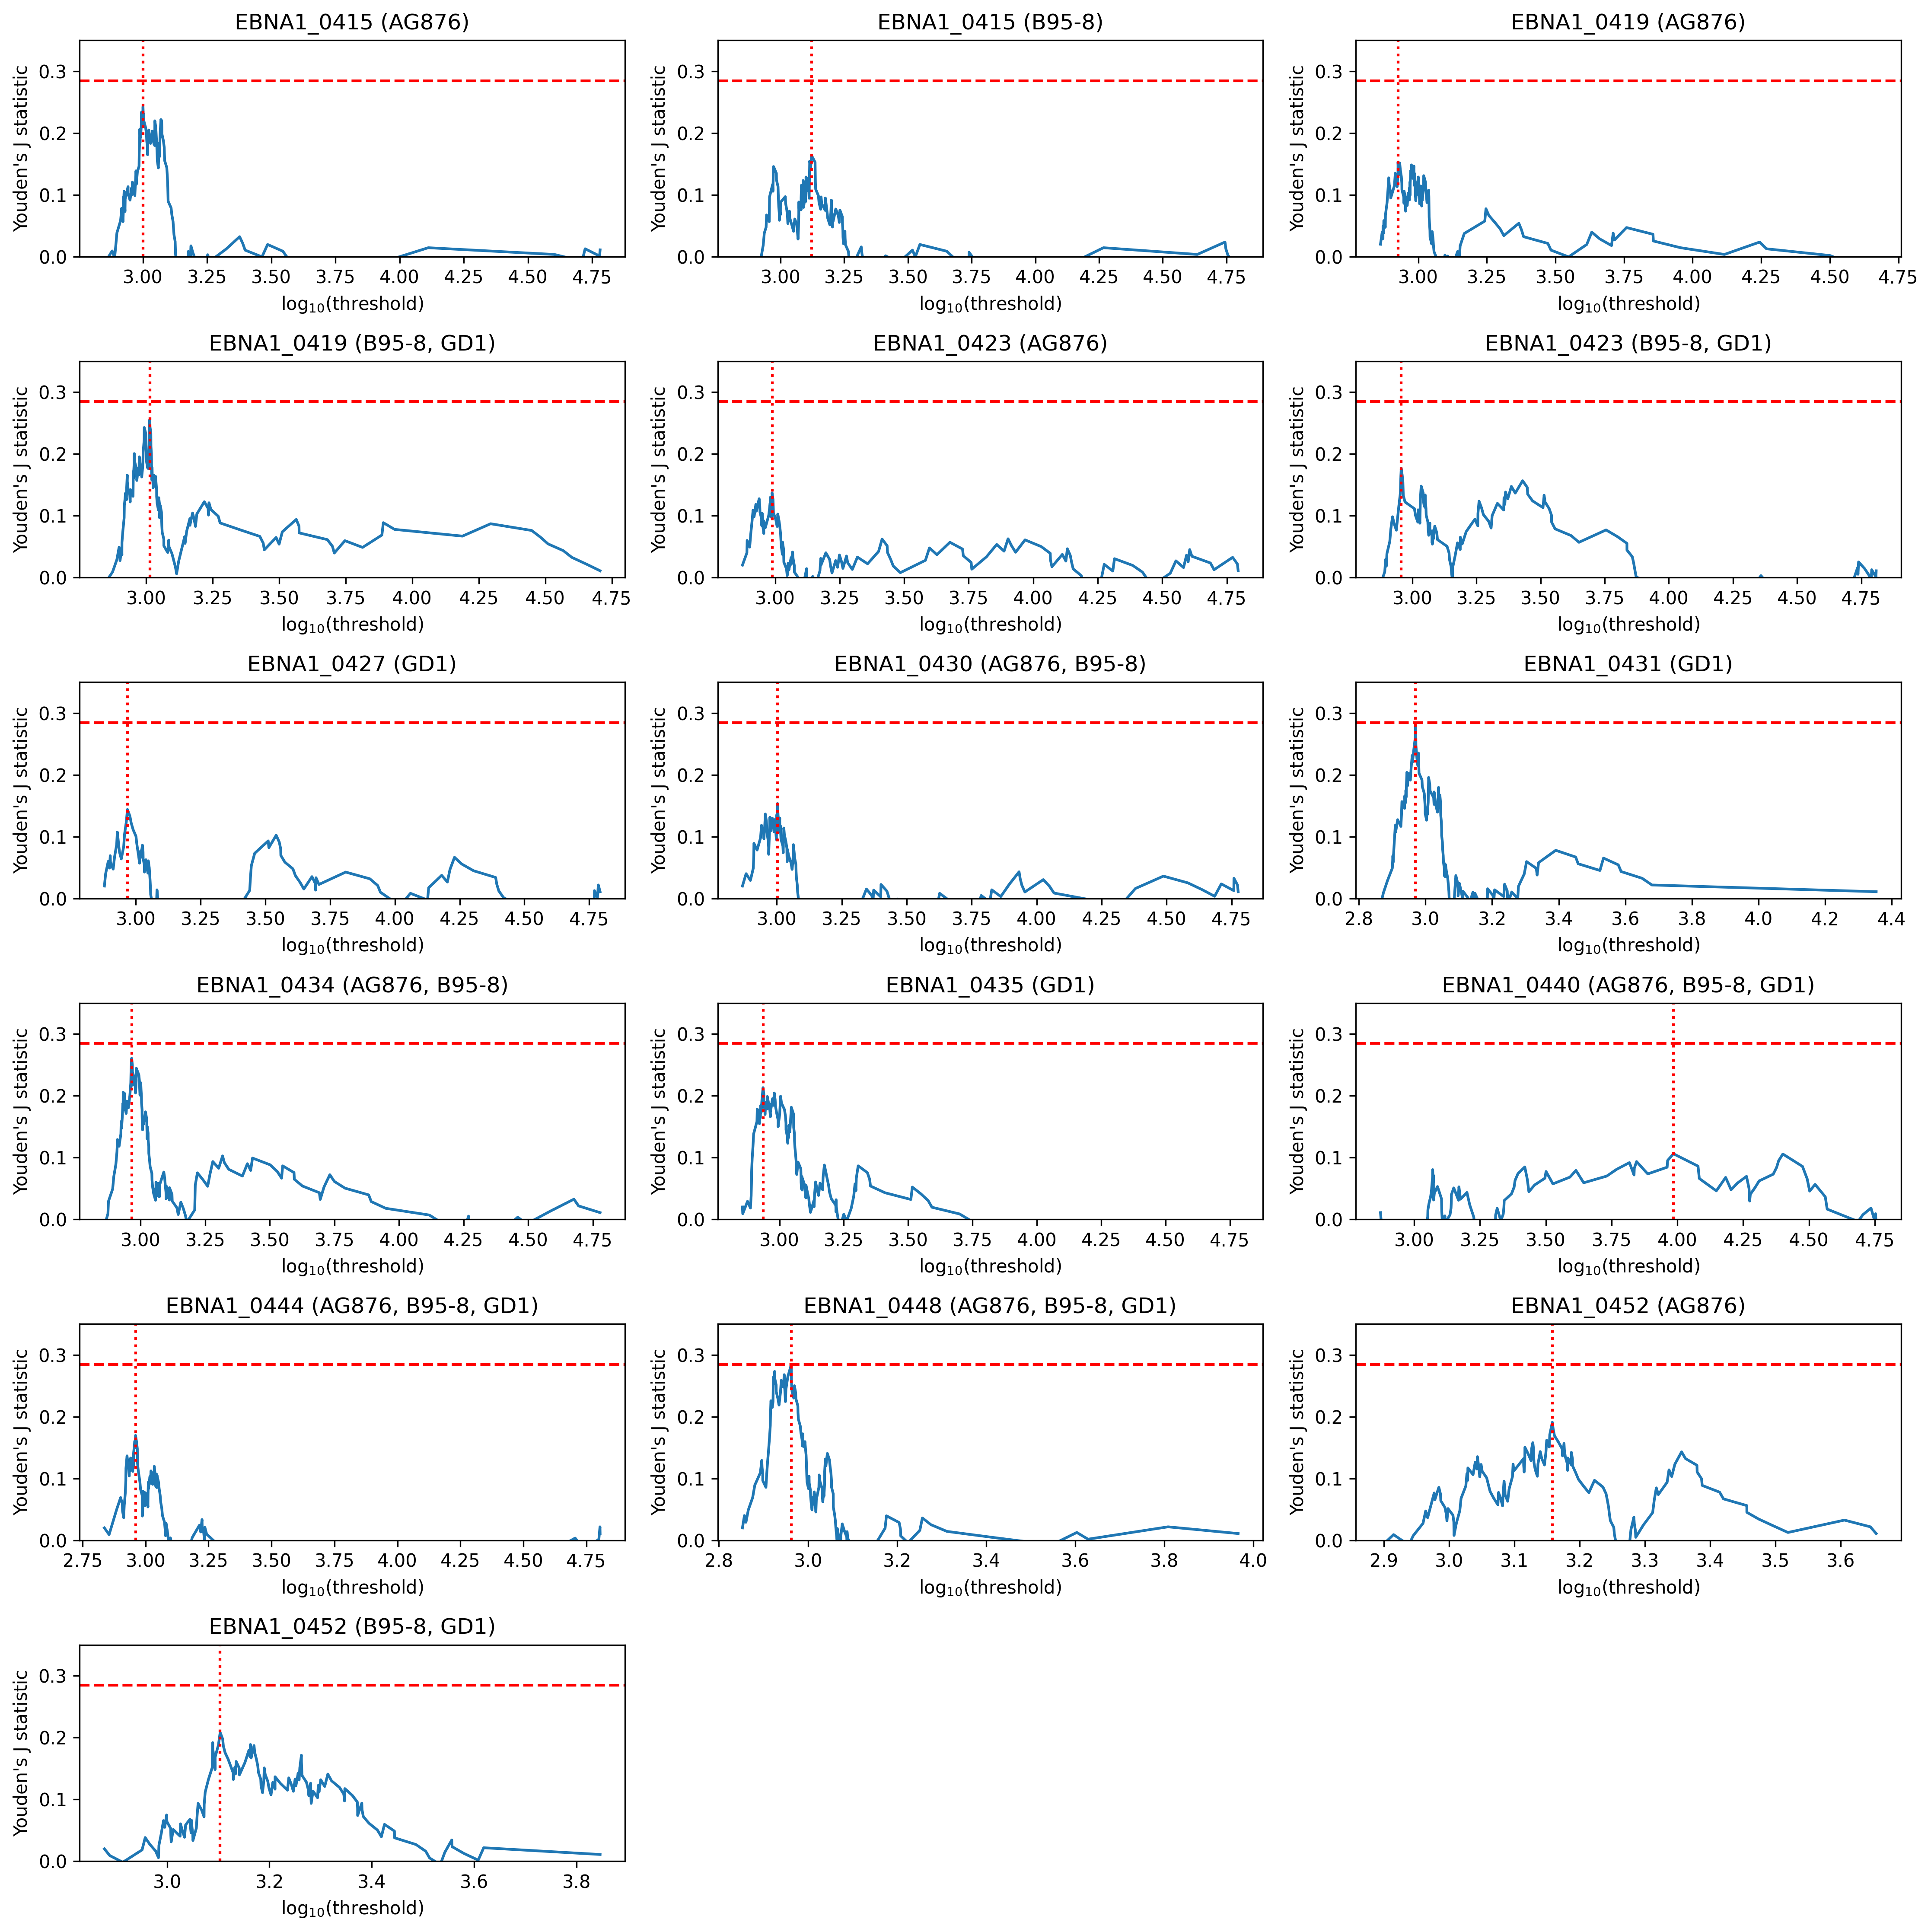

In [10]:
plot_signals_youden(smr, all_lower_bounds, youden)

**ROC01**

In [11]:
smr_roc01 = smr[['name', 'min_roc01', 'roc01_lower_bound', 'roc01_upper_bound']]
smr_roc01.columns = ['ID', "ROC01", 'lower bound', 'upper bound']
smr_roc01.iloc[:, 1:] = np.round(smr_roc01.iloc[:, 1:], 3)
smr_roc01

ID  ROC01  lower bound  upper bound
0               EBNA1_0415 (AG876)  0.552     1113.000     1123.000
1               EBNA1_0415 (B95-8)  0.594     1324.000     1367.000
2               EBNA1_0419 (AG876)  0.619     1000.333     1004.000
3          EBNA1_0419 (B95-8, GD1)  0.535     1033.333     1034.000
4               EBNA1_0423 (AG876)  0.679     1571.667     1626.000
5          EBNA1_0423 (B95-8, GD1)  0.620     1820.000     1861.333
6                 EBNA1_0427 (GD1)  0.669     3244.500     3263.667
7        EBNA1_0430 (AG876, B95-8)  0.648     1065.000     1070.000
8                 EBNA1_0431 (GD1)  0.582     1094.333     1096.333
9        EBNA1_0434 (AG876, B95-8)  0.591     1001.667     1004.000
10                EBNA1_0435 (GD1)  0.583     1112.000     1112.000
11  EBNA1_0440 (AG876, B95-8, GD1)  0.670     1479.333     1499.667
12  EBNA1_0444 (AG876, B95-8, GD1)  0.628     1083.333     1090.000
13  EBNA1_0448 (AG876, B95-8, GD1)  0.556      917.333      917.667
14              EBNA1_0452 (AG876)  0.585     1438.667     1443.000
15         EBNA1_0452 (B95-8, GD1)  0.574     1455.000     1458.333

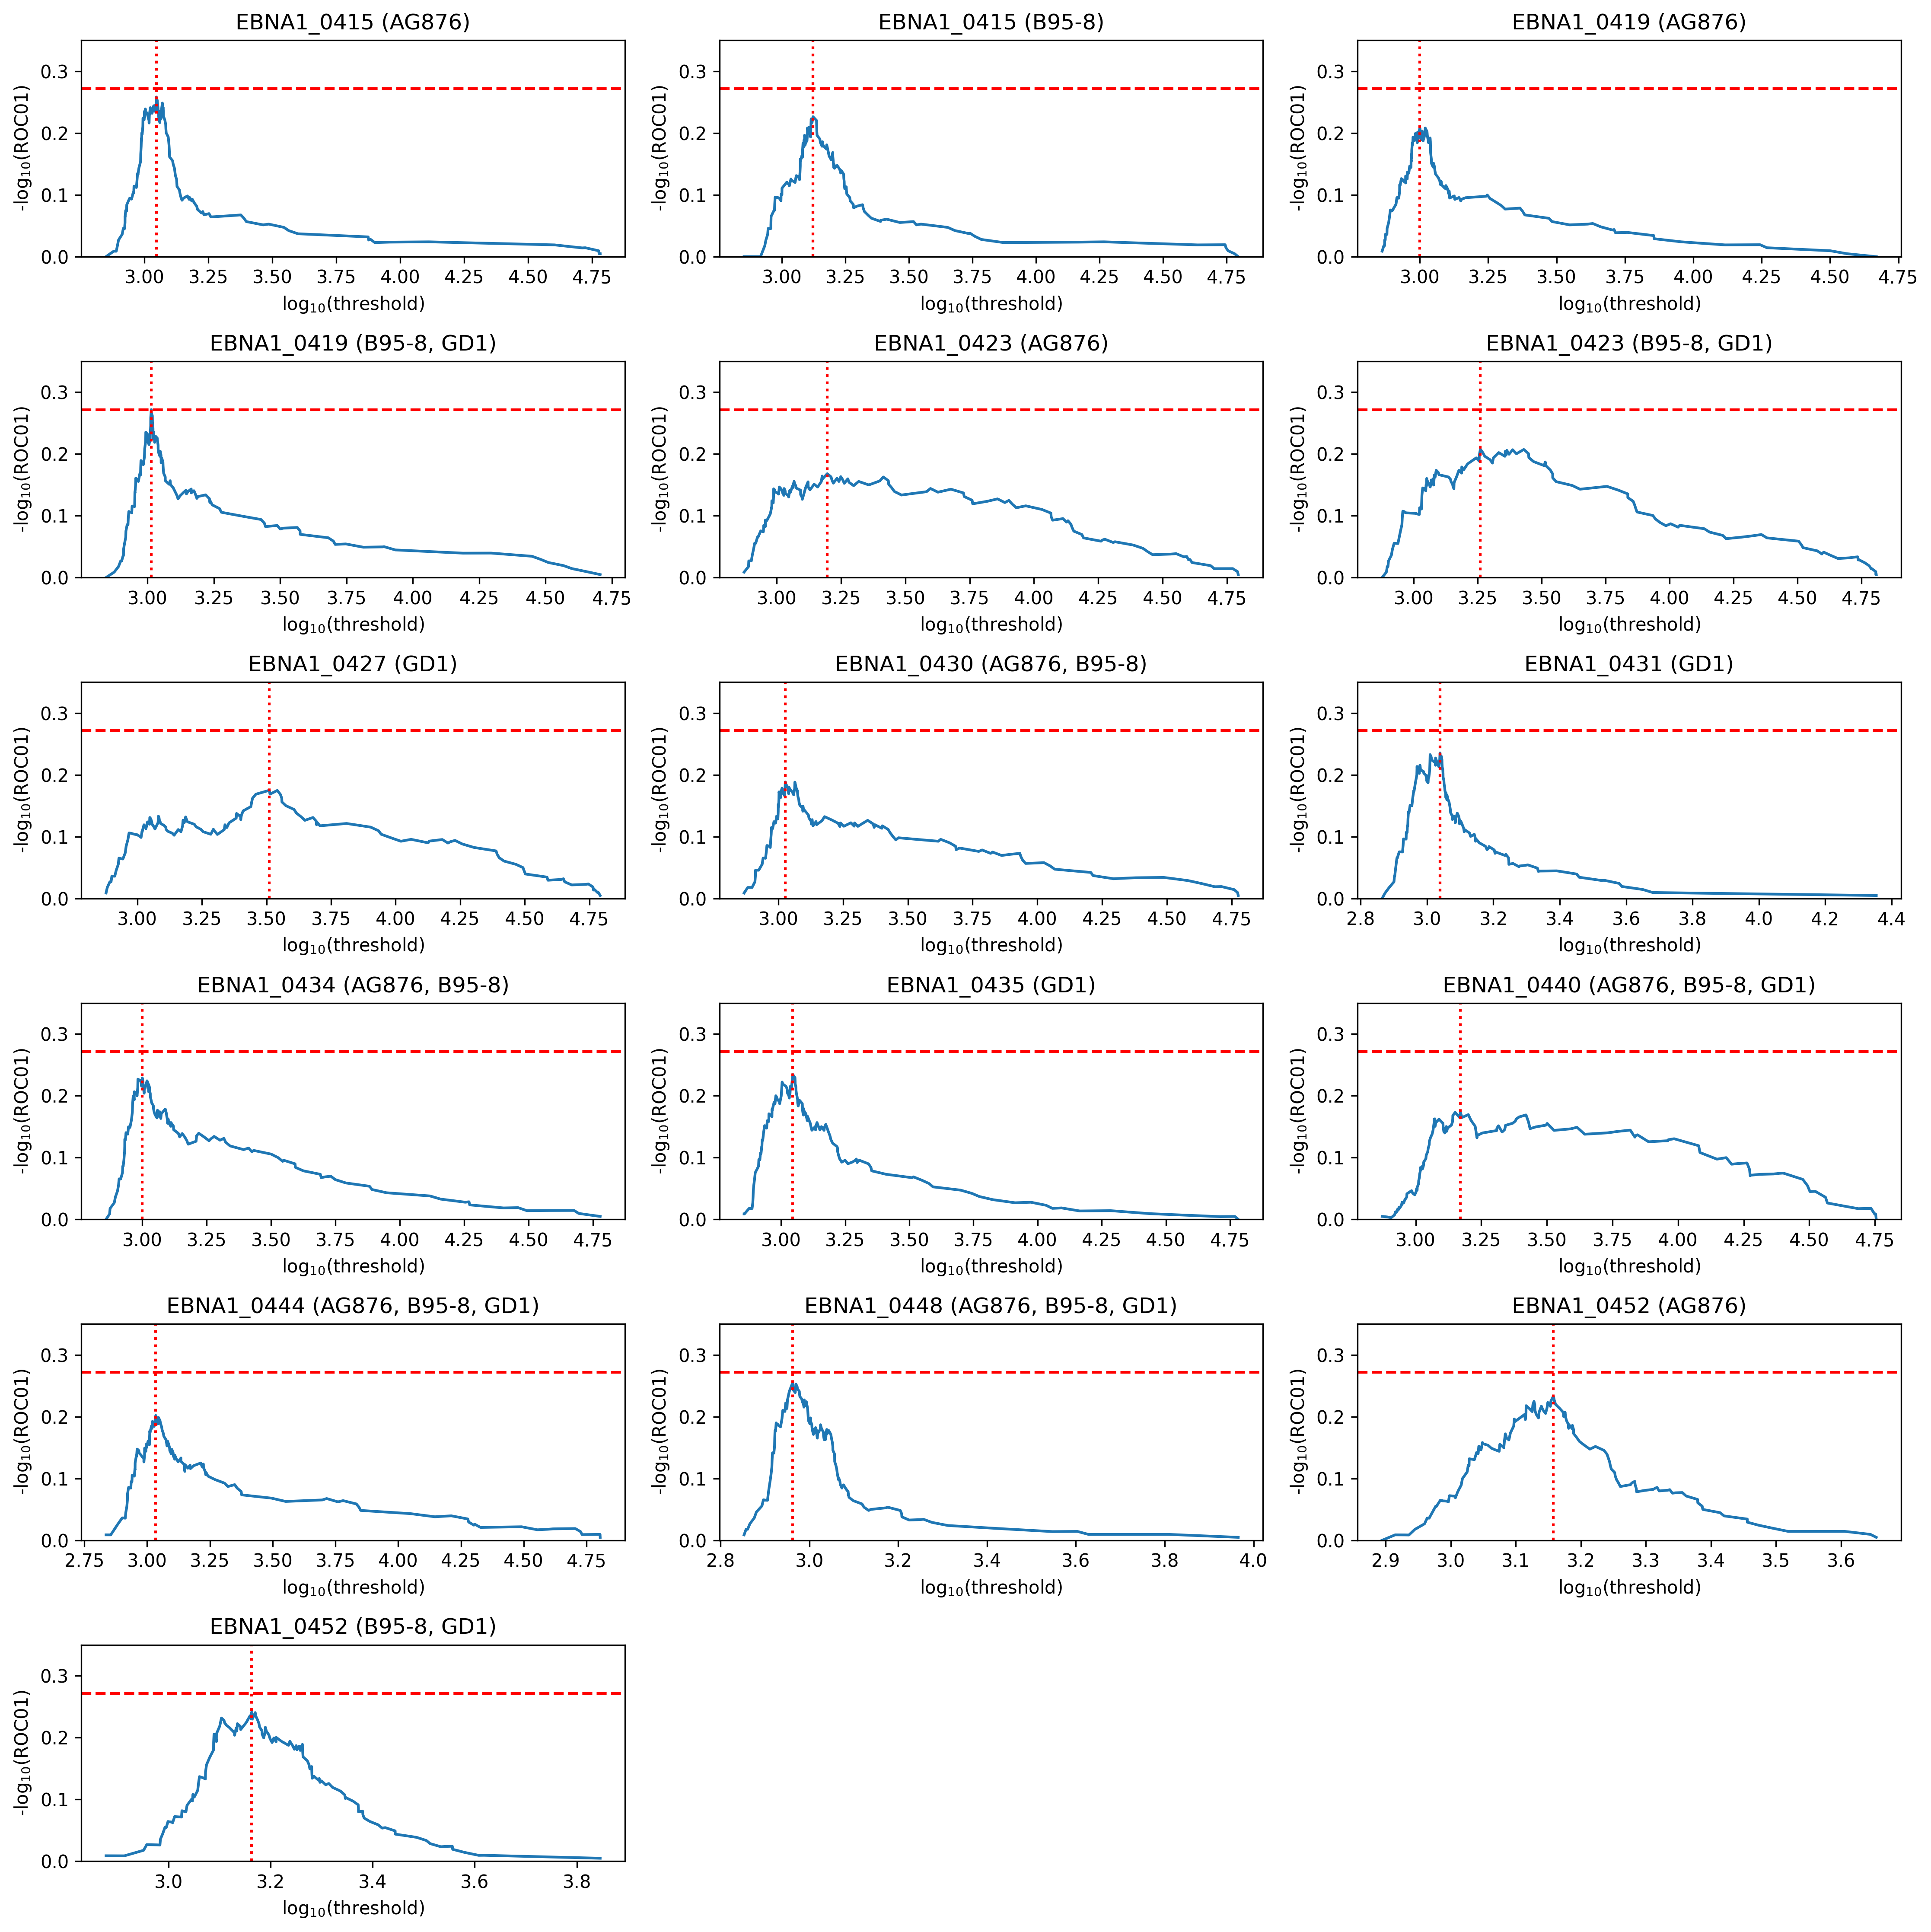

In [12]:
plot_signals_roc01(smr, all_lower_bounds, roc01)

**AUC (single threshold)**

In [13]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

ID  maximum AUC  lower bound  upper bound
0               EBNA1_0415 (AG876)     0.621304     1001.000     1003.000
1               EBNA1_0415 (B95-8)     0.581739     1324.000     1367.000
2               EBNA1_0419 (AG876)     0.576522      844.000      845.667
3          EBNA1_0419 (B95-8, GD1)     0.627826     1033.333     1034.000
4               EBNA1_0423 (AG876)     0.568478      973.000      981.000
5          EBNA1_0423 (B95-8, GD1)     0.588261      905.000      913.000
6                 EBNA1_0427 (GD1)     0.571957      928.667      949.333
7        EBNA1_0430 (AG876, B95-8)     0.576739     1006.667     1009.667
8                 EBNA1_0431 (GD1)     0.640217      933.000      933.667
9        EBNA1_0434 (AG876, B95-8)     0.630217      923.333      929.333
10                EBNA1_0435 (GD1)     0.606522      863.333      869.667
11  EBNA1_0440 (AG876, B95-8, GD1)     0.560217      991.333     1003.667
12  EBNA1_0444 (AG876, B95-8, GD1)     0.584783      912.667      921.333
13  EBNA1_0448 (AG876, B95-8, GD1)     0.642174      917.333      917.667
14              EBNA1_0452 (AG876)     0.595435     1438.667     1443.000
15         EBNA1_0452 (B95-8, GD1)     0.604130     1269.667     1284.333

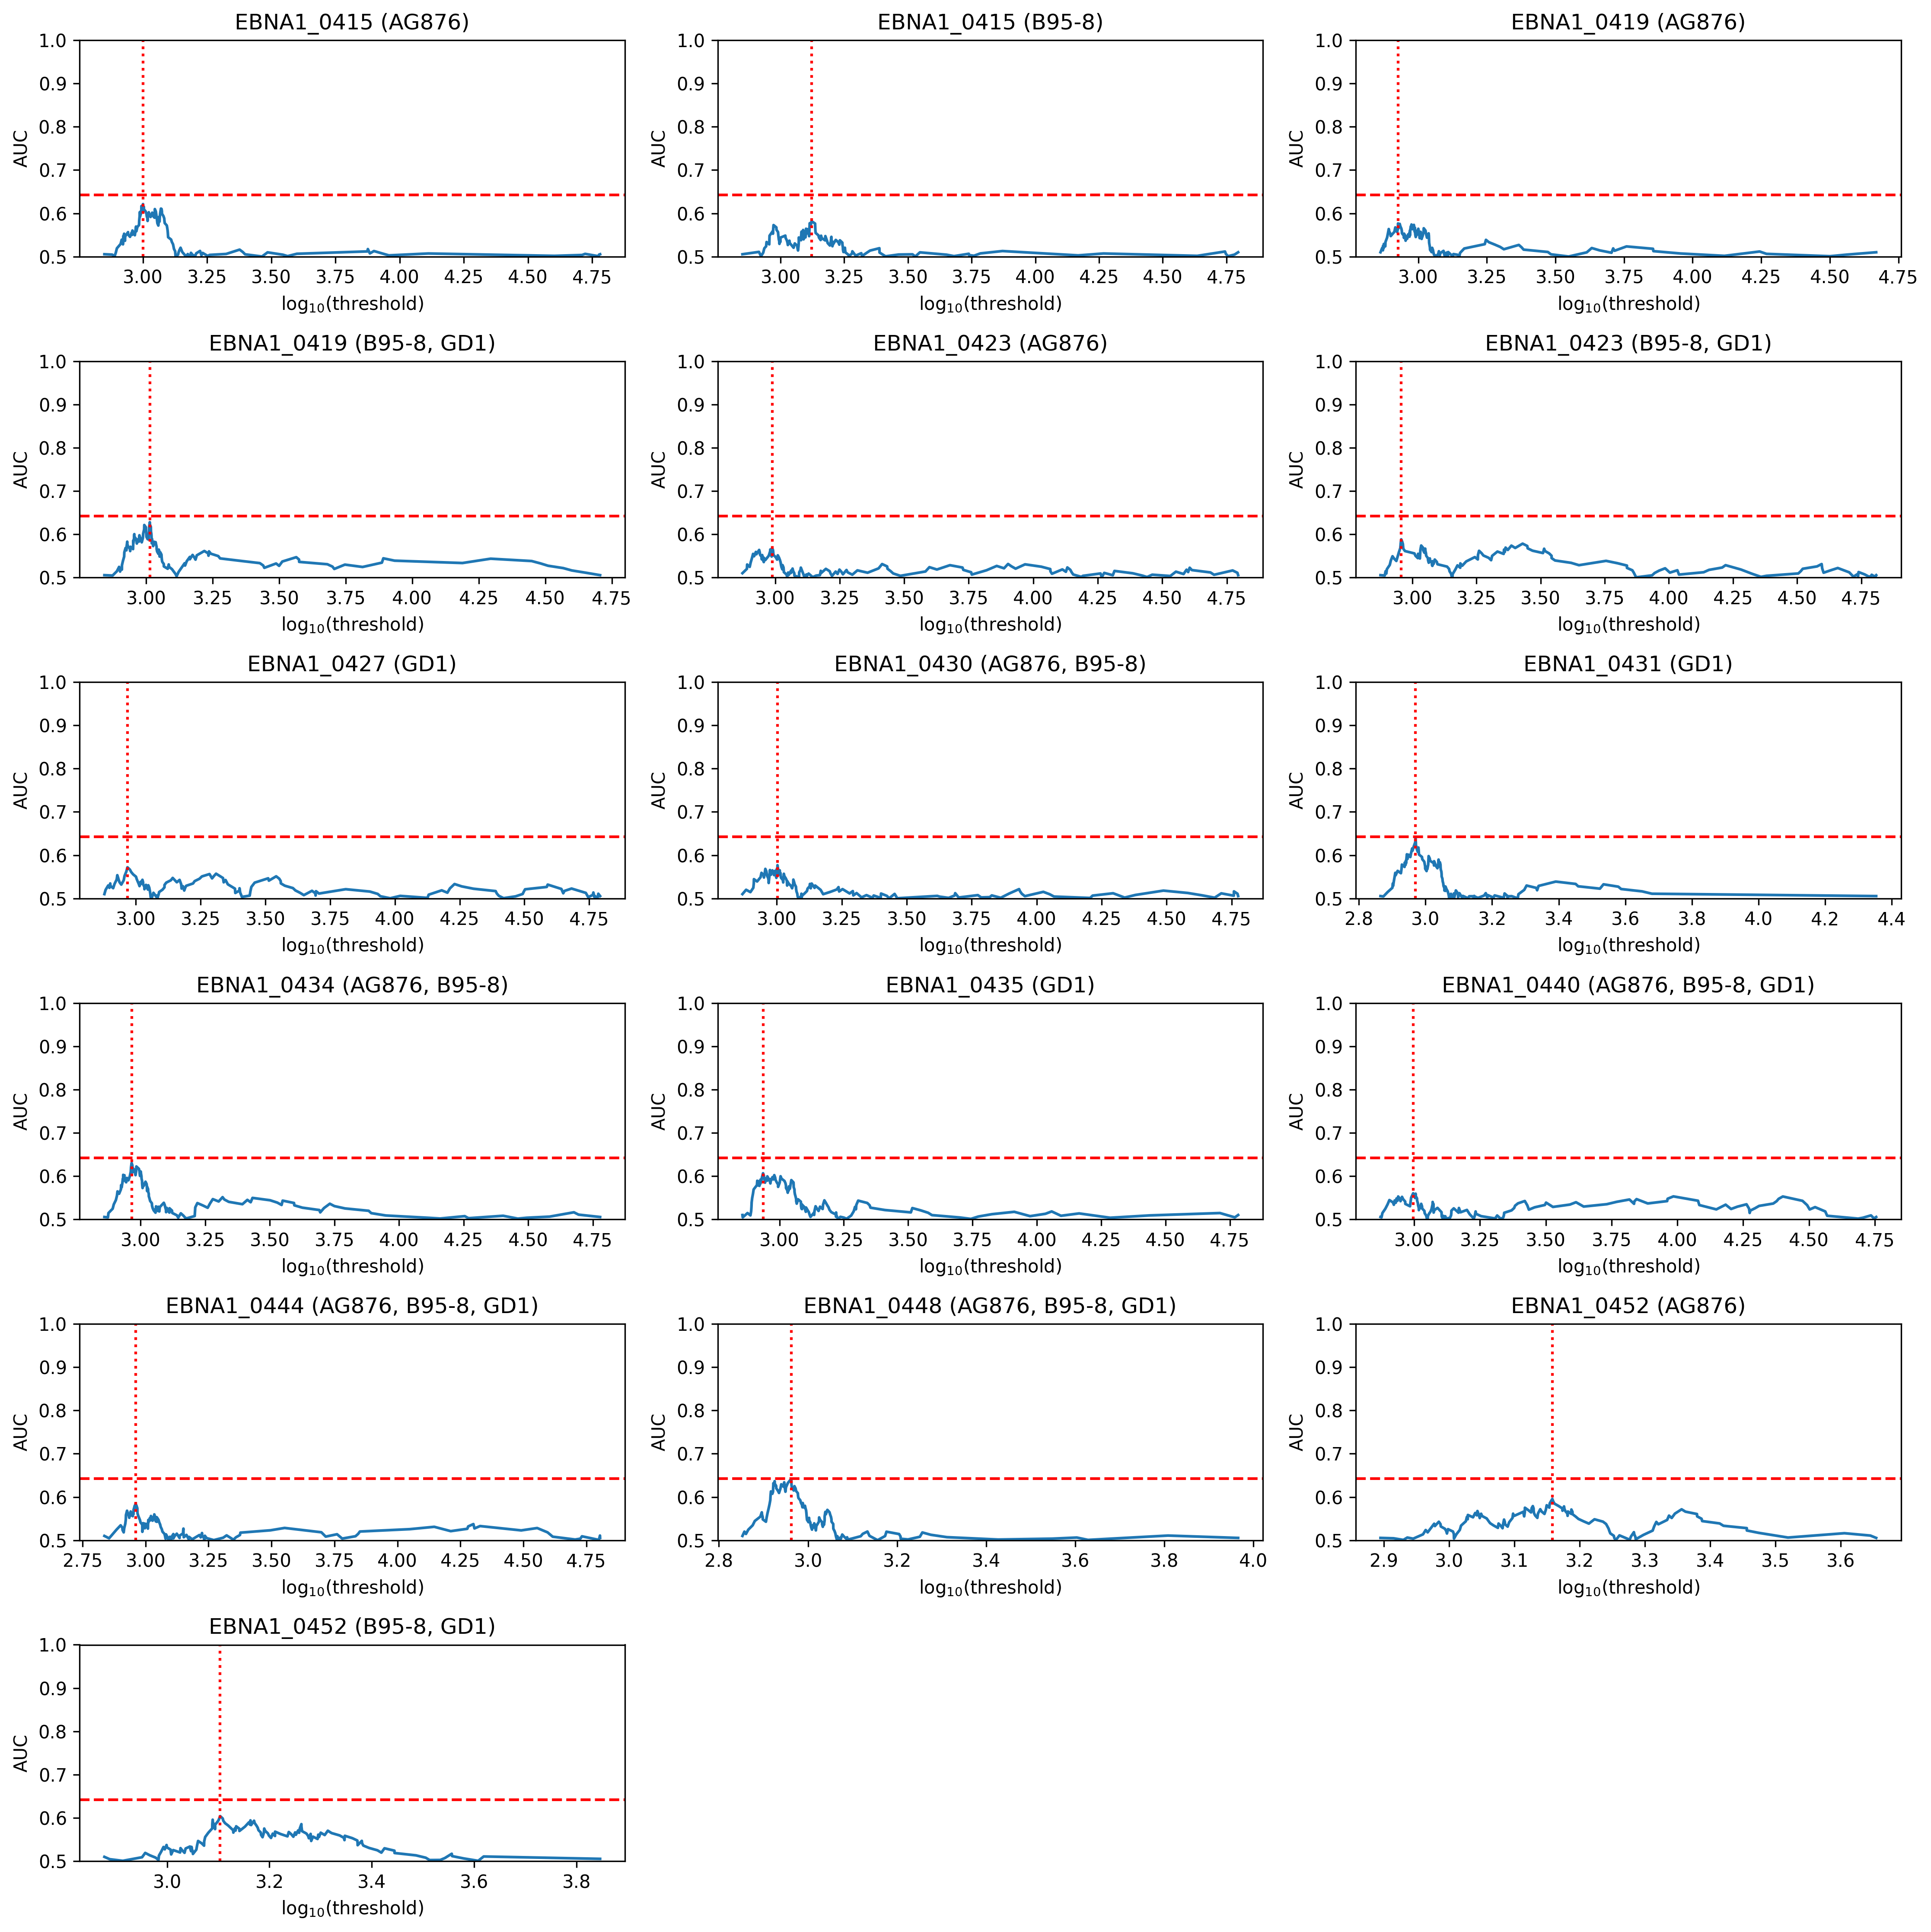

In [14]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [15]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

ID  maximum Gini decrease  lower bound  \
0               EBNA1_0415 (AG876)               0.029019     1001.000   
1               EBNA1_0415 (B95-8)               0.023373      939.000   
2               EBNA1_0419 (AG876)               0.023637      780.667   
3          EBNA1_0419 (B95-8, GD1)               0.029019      985.000   
4               EBNA1_0423 (AG876)               0.026450      821.000   
5          EBNA1_0423 (B95-8, GD1)               0.034330      905.000   
6                 EBNA1_0427 (GD1)               0.019475      928.667   
7        EBNA1_0430 (AG876, B95-8)               0.024522      873.667   
8                 EBNA1_0431 (GD1)               0.047968      933.000   
9        EBNA1_0434 (AG876, B95-8)               0.042367      923.333   
10                EBNA1_0435 (GD1)               0.042752      819.667   
11  EBNA1_0440 (AG876, B95-8, GD1)               0.020433      805.000   
12  EBNA1_0444 (AG876, B95-8, GD1)               0.023326      844.333   
13  EBNA1_0448 (AG876, B95-8, GD1)               0.051880      841.667   
14              EBNA1_0452 (AG876)               0.021302     2270.000   
15         EBNA1_0452 (B95-8, GD1)               0.019976     1269.667   

    upper bound  
0      1003.000  
1       963.333  
2       783.667  
3       999.333  
4       828.500  
5       913.000  
6       949.333  
7       889.333  
8       933.667  
9       929.333  
10      824.000  
11      830.667  
12      850.333  
13      842.000  
14     2301.000  
15     1284.333

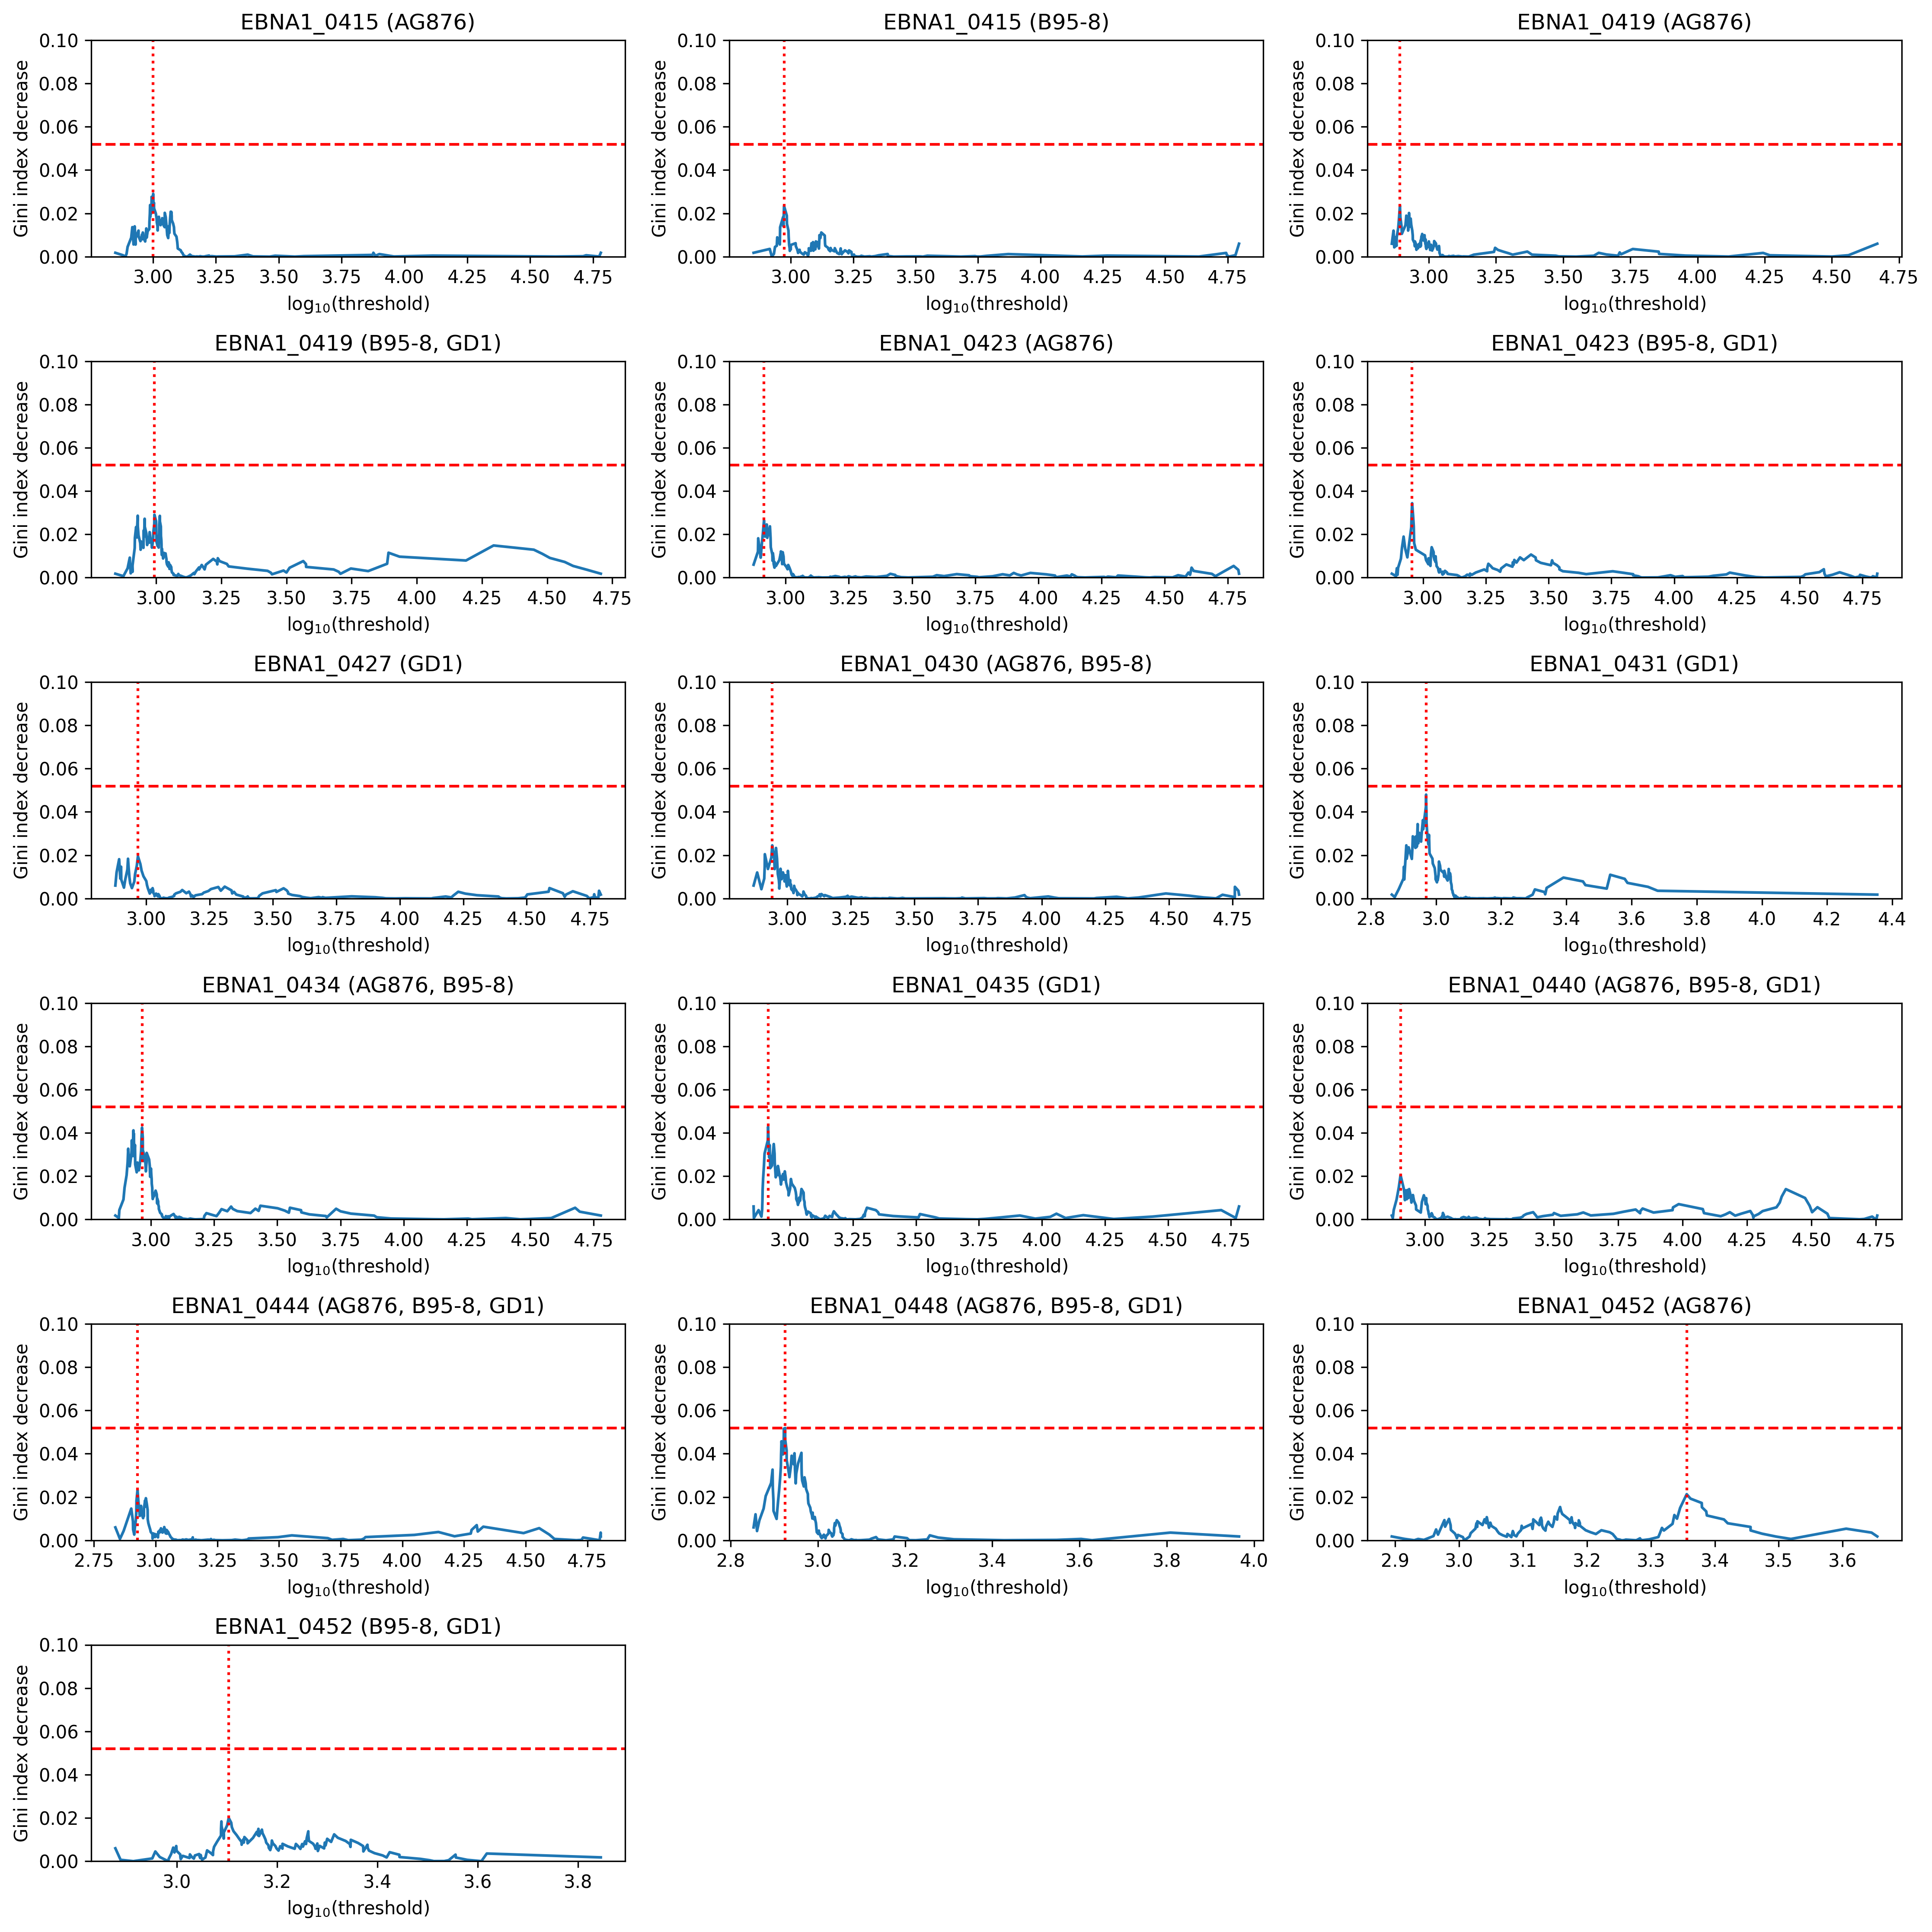

In [16]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [17]:
summarize_thresholds(smr)

Threshold  p-value  \
ID                             MAX AUC Method                                  
EBNA1_0415 (AG876)             0.602   Chi-square           1001.00   0.0049   
                                       ROC01                1113.00   0.0197   
                                       Youden               1001.00   0.0049   
                                       |Sen-Spe|            1126.33   0.0376   
                                       Gini                 1001.00   0.0049   
                                       AUC (single thr.)    1001.00   0.0049   
EBNA1_0415 (B95-8)             0.562   Chi-square            939.00   0.0159   
                                       ROC01                1324.00   0.0918   
                                       Youden               1324.00   0.0918   
                                       |Sen-Spe|            1297.67   0.2600   
                                       Gini                  939.00   0.0159   
                                       AUC (single thr.)    1324.00   0.0918   
EBNA1_0419 (AG876)             0.569   Chi-square            780.67   0.0171   
                                       ROC01                1000.33   0.1937   
                                       Youden                844.00   0.0244   
                                       |Sen-Spe|            1020.33   0.2600   
                                       Gini                  780.67   0.0171   
                                       AUC (single thr.)     844.00   0.0244   
EBNA1_0419 (B95-8, GD1)        0.618   Chi-square            985.00   0.0049   
                                       ROC01                1033.33   0.0051   
                                       Youden               1033.33   0.0051   
                                       |Sen-Spe|            1061.33   0.1090   
                                       Gini                  985.00   0.0049   
                                       AUC (single thr.)    1033.33   0.0051   
EBNA1_0423 (AG876)             0.542   Chi-square            821.00   0.0138   
                                       ROC01                1571.67   0.7797   
                                       Youden                973.00   0.0902   
                                       |Sen-Spe|            1501.67   0.8605   
                                       Gini                  821.00   0.0138   
                                       AUC (single thr.)     973.00   0.0902   
EBNA1_0423 (B95-8, GD1)        0.561   Chi-square            905.00   0.0029   
                                       ROC01                1820.00   0.2187   
                                       Youden                905.00   0.0029   
                                       |Sen-Spe|            1800.00   0.4384   
                                       Gini                  905.00   0.0029   
                                       AUC (single thr.)     905.00   0.0029   
EBNA1_0427 (GD1)               0.513   Chi-square            928.67   0.0280   
                                       ROC01                3244.50   0.3629   
                                       Youden                928.67   0.0280   
                                       |Sen-Spe|            2041.00   0.2600   
                                       Gini                  928.67   0.0280   
                                       AUC (single thr.)     928.67   0.0280   
EBNA1_0430 (AG876, B95-8)      0.542   Chi-square            873.67   0.0163   
                                       ROC01                1065.00   0.2447   
                                       Youden               1006.67   0.0735   
                                       |Sen-Spe|            1211.67   1.0000   
                                       Gini                  873.67   0.0163   
                                       AUC (single thr.)    1006.67   0.0735   
EBNA1_0431 (GD1)               0.594   Chi-square         

In [18]:
summarize_thresholds2(smr)

Chi-squared             ROC01  \
ID                                                                  
EBNA1_0415 (AG876)              1001.0 (0.0049)   1113.0 (0.0197)   
EBNA1_0415 (B95-8)               939.0 (0.0159)   1324.0 (0.0918)   
EBNA1_0419 (AG876)              780.67 (0.0171)  1000.33 (0.1937)   
EBNA1_0419 (B95-8, GD1)          985.0 (0.0049)  1033.33 (0.0051)   
EBNA1_0423 (AG876)               821.0 (0.0138)  1571.67 (0.7797)   
EBNA1_0423 (B95-8, GD1)          905.0 (0.0029)   1820.0 (0.2187)   
EBNA1_0427 (GD1)                 928.67 (0.028)   3244.5 (0.3629)   
EBNA1_0430 (AG876, B95-8)       873.67 (0.0163)   1065.0 (0.2447)   
EBNA1_0431 (GD1)                 933.0 (0.0003)  1094.33 (0.0601)   
EBNA1_0434 (AG876, B95-8)       923.33 (0.0006)   1001.67 (0.012)   
EBNA1_0435 (GD1)                819.67 (0.0009)    1112.0 (0.056)   
EBNA1_0440 (AG876, B95-8, GD1)   805.0 (0.0371)  1479.33 (0.6721)   
EBNA1_0444 (AG876, B95-8, GD1)  844.33 (0.0169)  1083.33 (0.2302)   
EBNA1_0448 (AG876, B95-8, GD1)  841.67 (0.0001)   917.33 (0.0008)   
EBNA1_0452 (AG876)              2270.0 (0.0216)  1438.67 (0.0445)   
EBNA1_0452 (B95-8, GD1)         1269.67 (0.021)   1455.0 (0.0478)   

                               Youden's J statistic         |Sen-Spe|  \
ID                                                                      
EBNA1_0415 (AG876)                  1001.0 (0.0049)  1126.33 (0.0376)   
EBNA1_0415 (B95-8)                  1324.0 (0.0918)    1297.67 (0.26)   
EBNA1_0419 (AG876)                   844.0 (0.0244)    1020.33 (0.26)   
EBNA1_0419 (B95-8, GD1)            1033.33 (0.0051)   1061.33 (0.109)   
EBNA1_0423 (AG876)                   973.0 (0.0902)  1501.67 (0.8605)   
EBNA1_0423 (B95-8, GD1)              905.0 (0.0029)   1800.0 (0.4384)   
EBNA1_0427 (GD1)                     928.67 (0.028)     2041.0 (0.26)   
EBNA1_0430 (AG876, B95-8)          1006.67 (0.0735)     1211.67 (1.0)   
EBNA1_0431 (GD1)                     933.0 (0.0003)    1109.0 (0.109)   
EBNA1_0434 (AG876, B95-8)           923.33 (0.0006)  1123.33 (0.7646)   
EBNA1_0435 (GD1)                    863.33 (0.0023)  1161.67 (0.4384)   
EBNA1_0440 (AG876, B95-8, GD1)      9660.0 (0.2062)  1474.33 (0.7646)   
EBNA1_0444 (AG876, B95-8, GD1)      912.67 (0.0254)  1132.67 (0.4384)   
EBNA1_0448 (AG876, B95-8, GD1)      917.33 (0.0008)  1002.67 (0.4384)   
EBNA1_0452 (AG876)                 1438.67 (0.0445)   1348.67 (0.211)   
EBNA1_0452 (B95-8, GD1)             1269.67 (0.021)  1459.33 (0.0841)   

                                           Gini AUC (single thr.)  
ID                                                                 
EBNA1_0415 (AG876)              1001.0 (0.0049)   1001.0 (0.0049)  
EBNA1_0415 (B95-8)               939.0 (0.0159)   1324.0 (0.0918)  
EBNA1_0419 (AG876)              780.67 (0.0171)    844.0 (0.0244)  
EBNA1_0419 (B95-8, GD1)          985.0 (0.0049)  1033.33 (0.0051)  
EBNA1_0423 (AG876)               821.0 (0.0138)    973.0 (0.0902)  
EBNA1_0423 (B95-8, GD1)          905.0 (0.0029)    905.0 (0.0029)  
EBNA1_0427 (GD1)                 928.67 (0.028)    928.67 (0.028)  
EBNA1_0430 (AG876, B95-8)       873.67 (0.0163)  1006.67 (0.0735)  
EBNA1_0431 (GD1)                 933.0 (0.0003)    933.0 (0.0003)  
EBNA1_0434 (AG876, B95-8)       923.33 (0.0006)   923.33 (0.0006)  
EBNA1_0435 (GD1)                819.67 (0.0009)   863.33 (0.0023)  
EBNA1_0440 (AG876, B95-8, GD1)   805.0 (0.0371)   991.33 (0.1048)  
EBNA1_0444 (AG876, B95-8, GD1)  844.33 (0.0169)   912.67 (0.0254)  
EBNA1_0448 (AG876, B95-8, GD1)  841.67 (0.0001)   917.33 (0.0008)  
EBNA1_0452 (AG876)              2270.0 (0.0216)  1438.67 (0.0445)  
EBNA1_0452 (B95-8, GD1)         1269.67 (0.021)   1269.67 (0.021)

In [19]:
summarize_sen_spe(smr)

sensitivity                             \
                               Chi-squared ROC01 Youden's J statistic   
name                                                                    
EBNA1_0415 (AG876)                    0.46  0.60                 0.46   
EBNA1_0415 (B95-8)                    0.20  0.62                 0.62   
EBNA1_0419 (AG876)                    0.16  0.52                 0.24   
EBNA1_0419 (B95-8, GD1)               0.46  0.56                 0.56   
EBNA1_0423 (AG876)                    0.12  0.54                 0.30   
EBNA1_0423 (B95-8, GD1)               0.22  0.58                 0.22   
EBNA1_0427 (GD1)                      0.22  0.68                 0.22   
EBNA1_0430 (AG876, B95-8)             0.14  0.44                 0.36   
EBNA1_0431 (GD1)                      0.40  0.56                 0.40   
EBNA1_0434 (AG876, B95-8)             0.38  0.46                 0.38   
EBNA1_0435 (GD1)                      0.20  0.54                 0.30   
EBNA1_0440 (AG876, B95-8, GD1)        0.90  0.52                 0.28   
EBNA1_0444 (AG876, B95-8, GD1)        0.18  0.50                 0.30   
EBNA1_0448 (AG876, B95-8, GD1)        0.36  0.48                 0.48   
EBNA1_0452 (AG876)                    0.98  0.68                 0.68   
EBNA1_0452 (B95-8, GD1)               0.48  0.58                 0.48   

                                                                 specifiticy  \
                               |Sen-Spe|  Gini AUC (single thr.) Chi-squared   
name                                                                           
EBNA1_0415 (AG876)                  0.60  0.46              0.46        0.78   
EBNA1_0415 (B95-8)                  0.56  0.20              0.62        0.95   
EBNA1_0419 (AG876)                  0.56  0.16              0.24        0.97   
EBNA1_0419 (B95-8, GD1)             0.58  0.46              0.56        0.78   
EBNA1_0423 (AG876)                  0.52  0.12              0.30        0.99   
EBNA1_0423 (B95-8, GD1)             0.54  0.22              0.22        0.96   
EBNA1_0427 (GD1)                    0.44  0.22              0.22        0.92   
EBNA1_0430 (AG876, B95-8)           0.50  0.14              0.36        0.98   
EBNA1_0431 (GD1)                    0.58  0.40              0.40        0.88   
EBNA1_0434 (AG876, B95-8)           0.52  0.38              0.38        0.88   
EBNA1_0435 (GD1)                    0.54  0.20              0.30        0.98   
EBNA1_0440 (AG876, B95-8, GD1)      0.52  0.90              0.76        0.01   
EBNA1_0444 (AG876, B95-8, GD1)      0.54  0.18              0.30        0.96   
EBNA1_0448 (AG876, B95-8, GD1)      0.54  0.36              0.48        0.91   
EBNA1_0452 (AG876)                  0.56  0.98              0.68        0.16   
EBNA1_0452 (B95-8, GD1)             0.58  0.48              0.48        0.73   

                                                                           \
                               ROC01 Youden's J statistic |Sen-Spe|  Gini   
name                                                                        
EBNA1_0415 (AG876)              0.62                 0.78      0.60  0.78   
EBNA1_0415 (B95-8)              0.54                 0.54      0.55  0.95   
EBNA1_0419 (AG876)              0.61                 0.91      0.55  0.97   
EBNA1_0419 (B95-8, GD1)         0.70                 0.70      0.58  0.78   
EBNA1_0423 (AG876)              0.50                 0.84      0.51  0.99   
EBNA1_0423 (B95-8, GD1)         0.54                 0.96      0.54  0.96   
EBNA1_0427 (GD1)                0.41                 0.92      0.45  0.92   
EBNA1_0430 (AG876, B95-8)       0.67                 0.79      0.50  0.98   
EBNA1_0431 (GD1)                0.62                 0.88      0.58  0.88   
EBNA1_0434 (AG876, B95-8)       0.76                 0.88      0.52  0.88   
EBNA1_0435 (GD1)                0.64                 0.91      0.54  0.98   
EBNA1_0440 (AG876, B95-8, GD1)  0.53        

# Confidence intervals

In [20]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'CFS (min)', 'CFS (mean)', 'CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

ID  healthy (min)  healthy (mean)  \
0               EBNA1_0415 (AG876)           0.40            0.54   
1               EBNA1_0415 (B95-8)           0.69            0.80   
2               EBNA1_0419 (AG876)           0.74            0.84   
3          EBNA1_0419 (B95-8, GD1)           0.40            0.54   
4               EBNA1_0423 (AG876)           0.79            0.88   
5          EBNA1_0423 (B95-8, GD1)           0.67            0.78   
6                 EBNA1_0427 (GD1)           0.67            0.78   
7        EBNA1_0430 (AG876, B95-8)           0.76            0.86   
8                 EBNA1_0431 (GD1)           0.46            0.60   
9        EBNA1_0434 (AG876, B95-8)           0.49            0.62   
10                EBNA1_0435 (GD1)           0.69            0.80   
11  EBNA1_0440 (AG876, B95-8, GD1)           0.82            0.90   
12  EBNA1_0444 (AG876, B95-8, GD1)           0.71            0.82   
13  EBNA1_0448 (AG876, B95-8, GD1)           0.51            0.64   
14              EBNA1_0452 (AG876)           0.00            0.02   
15         EBNA1_0452 (B95-8, GD1)           0.38            0.52   

    healthy (max)  CFS (min)  CFS (mean)  CFS (max)  
0            0.68       0.70        0.78       0.87  
1            0.91       0.90        0.95       0.99  
2            0.94       0.93        0.97       1.00  
3            0.68       0.70        0.78       0.87  
4            0.97       0.97        0.99       1.00  
5            0.89       0.91        0.96       1.00  
6            0.89       0.87        0.92       0.98  
7            0.96       0.95        0.98       1.00  
8            0.74       0.81        0.88       0.95  
9            0.75       0.81        0.88       0.95  
10           0.91       0.95        0.98       1.00  
11           0.98       0.97        0.99       1.00  
12           0.93       0.91        0.96       1.00  
13           0.77       0.86        0.91       0.97  
14           0.06       0.09        0.16       0.24  
15           0.66       0.64        0.73       0.82

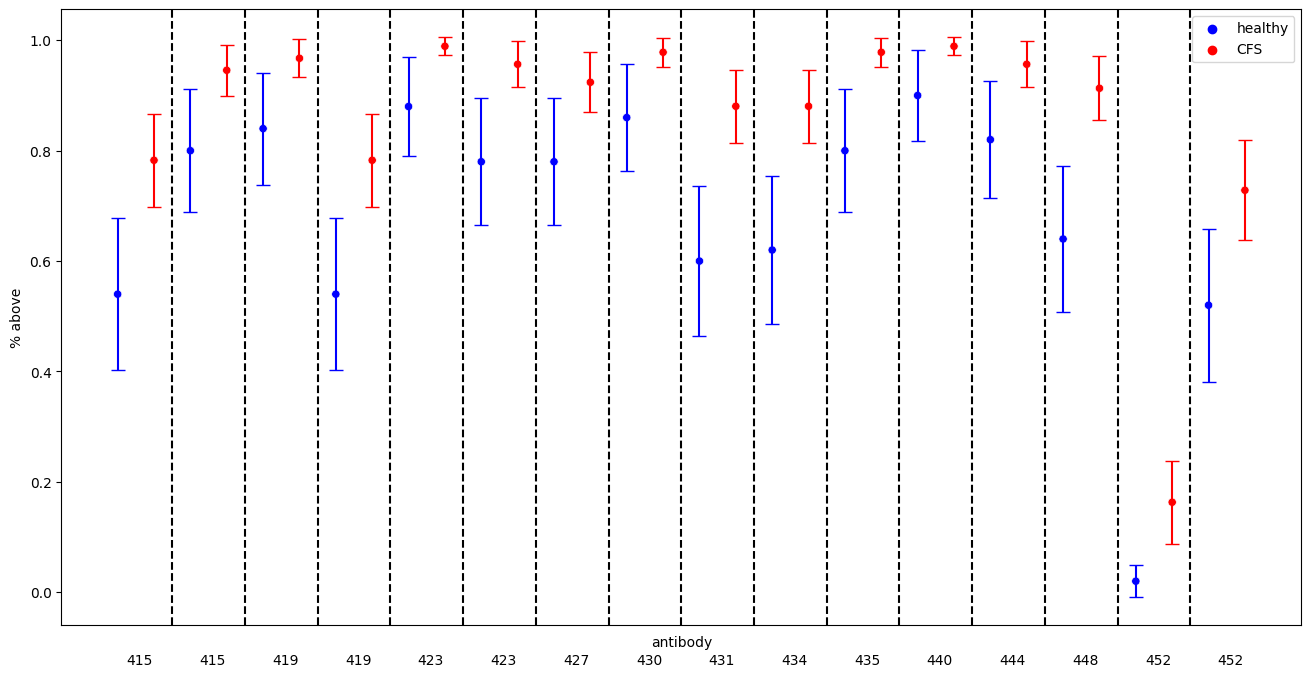

In [21]:
plot_conf_int(smr, 'healthy', 'CFS')

# Multiple testing correction

In [22]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [23]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [24]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [25]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

ID  Bonferroni  Benjamini-Hochberg  \
0               EBNA1_0415 (AG876)       1.106               1.951   
1               EBNA1_0415 (B95-8)       0.595               1.641   
2               EBNA1_0419 (AG876)       0.562               1.641   
3          EBNA1_0419 (B95-8, GD1)       1.106               1.951   
4               EBNA1_0423 (AG876)       0.657               1.641   
5          EBNA1_0423 (B95-8, GD1)       1.340               2.039   
6                 EBNA1_0427 (GD1)       0.349               1.525   
7        EBNA1_0430 (AG876, B95-8)       0.584               1.641   
8                 EBNA1_0431 (GD1)       2.379               2.680   
9        EBNA1_0434 (AG876, B95-8)       1.993               2.470   
10                EBNA1_0435 (GD1)       1.860               2.462   
11  EBNA1_0440 (AG876, B95-8, GD1)       0.227               1.431   
12  EBNA1_0444 (AG876, B95-8, GD1)       0.569               1.641   
13  EBNA1_0448 (AG876, B95-8, GD1)       2.620               2.680   
14              EBNA1_0452 (AG876)       0.461               1.607   
15         EBNA1_0452 (B95-8, GD1)       0.474               1.607   

    Benjamini-Yekutieli  2-stage Benjamini-Krieger-Yekutieli  
0                 1.422                                1.930  
1                 1.112                                1.620  
2                 1.112                                1.620  
3                 1.422                                1.930  
4                 1.112                                1.620  
5                 1.510                                2.018  
6                 0.996                                1.504  
7                 1.112                                1.620  
8                 2.151                                2.659  
9                 1.941                                2.449  
10                1.933                                2.441  
11                0.902                                1.410  
12                1.112                                1.620  
13                2.151                                2.659  
14                1.078                                1.586  
15                1.078                                1.586

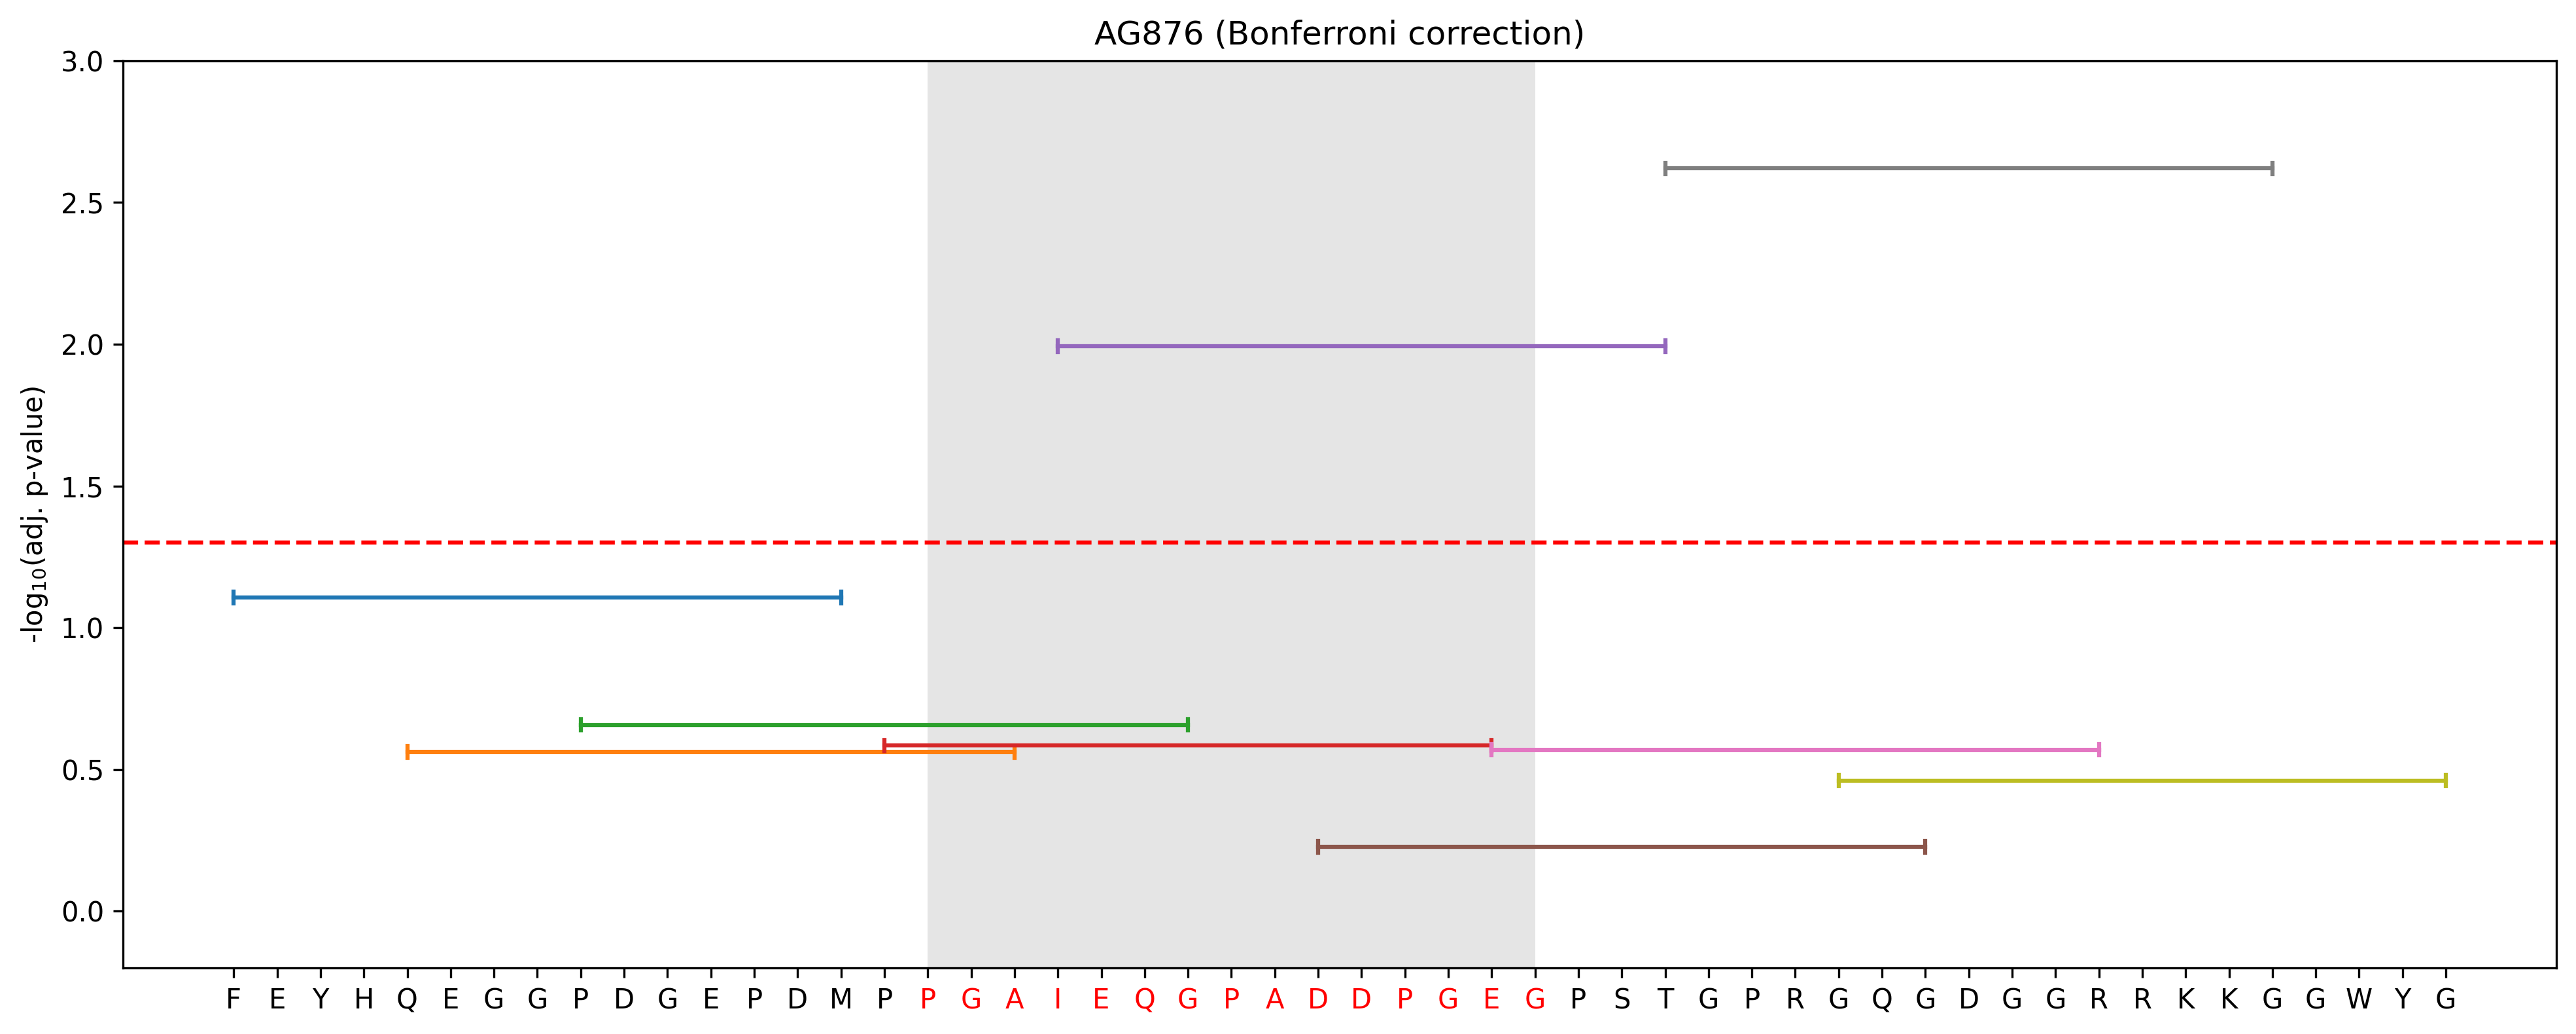

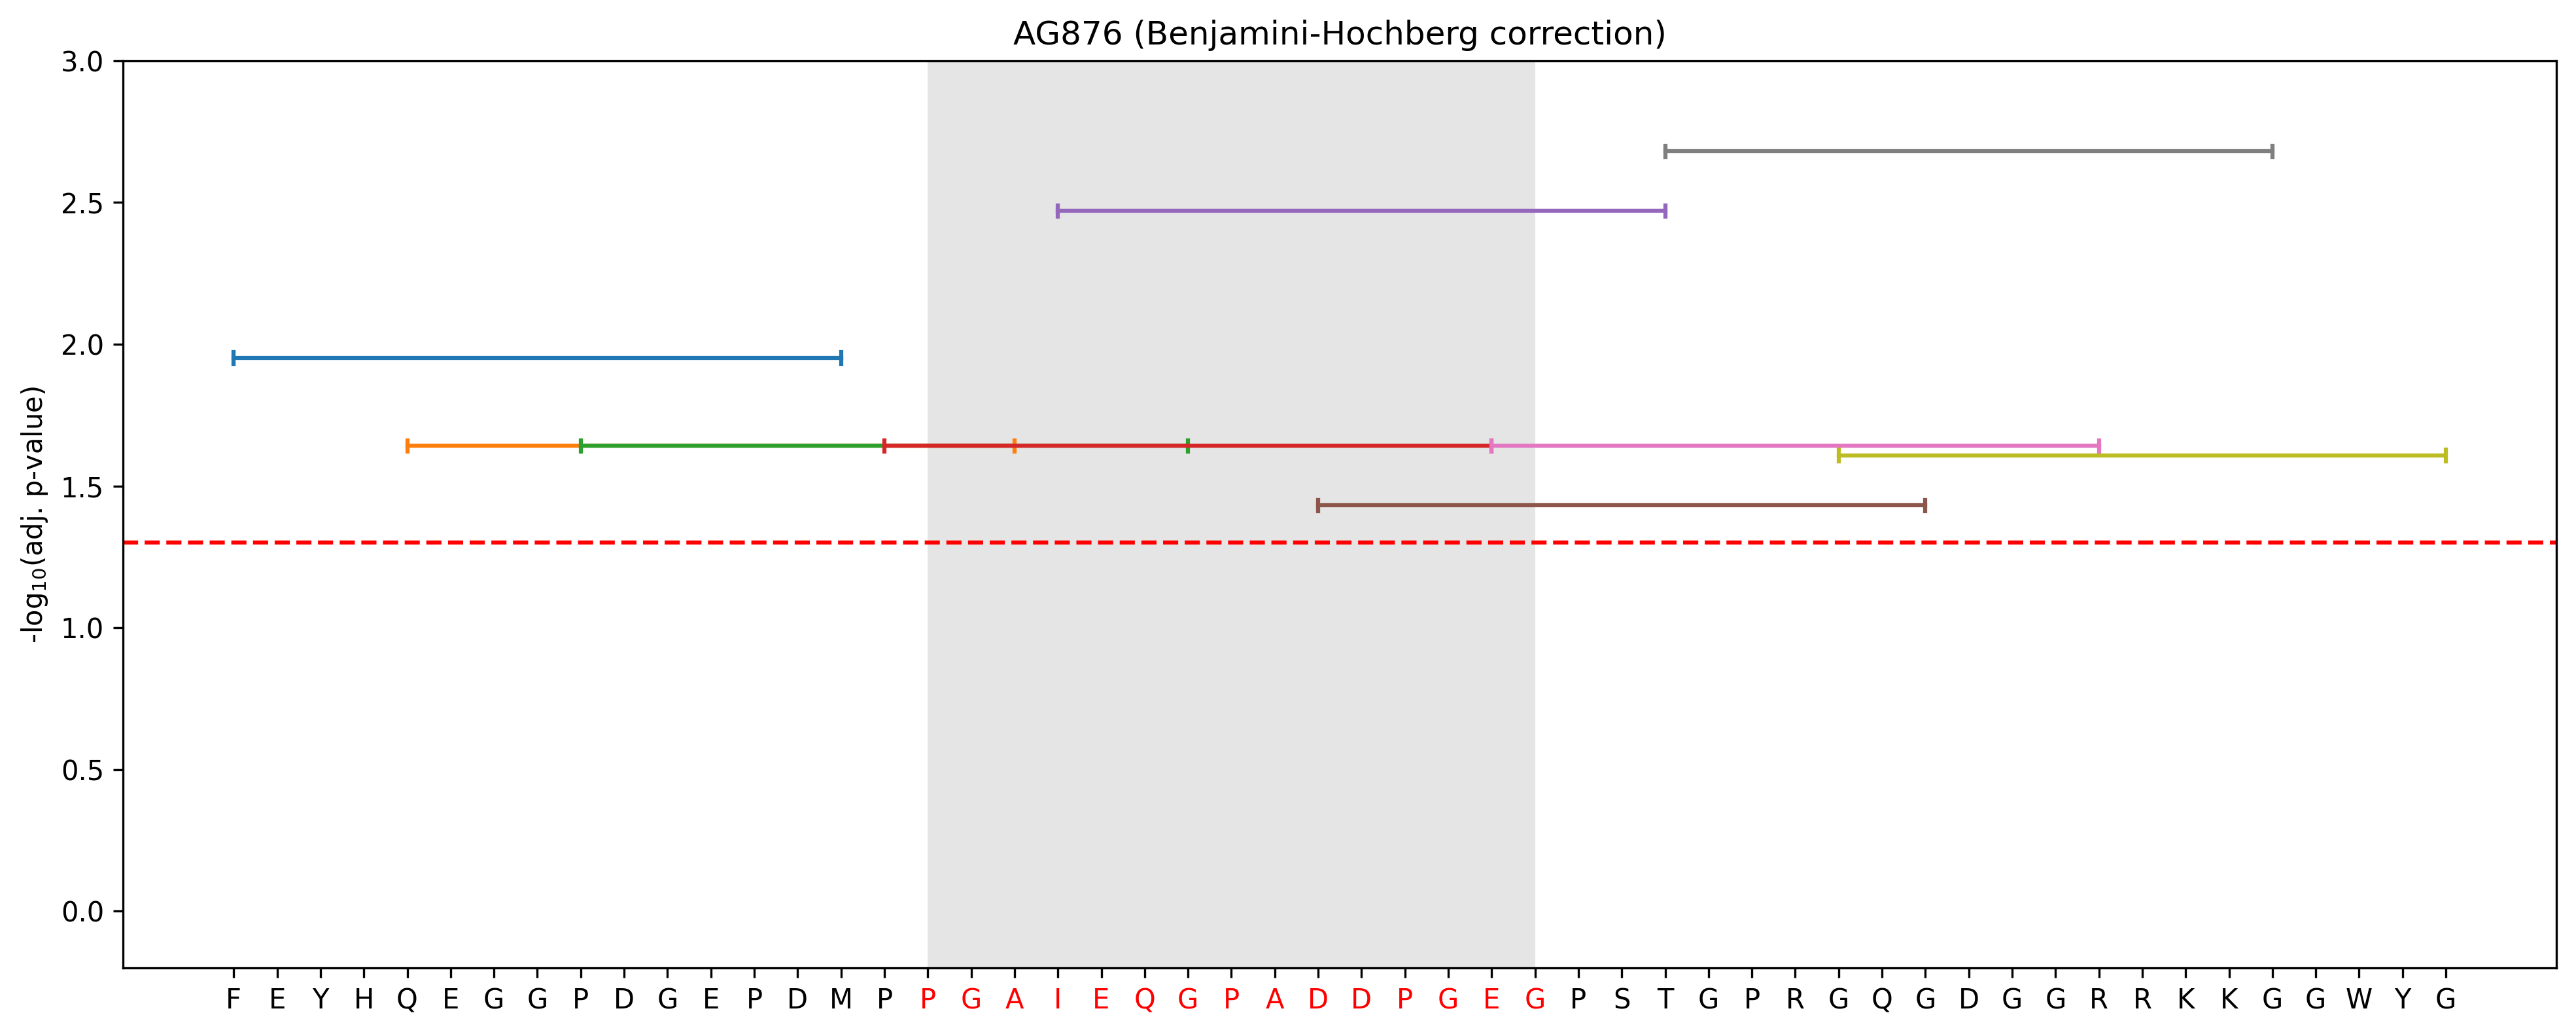

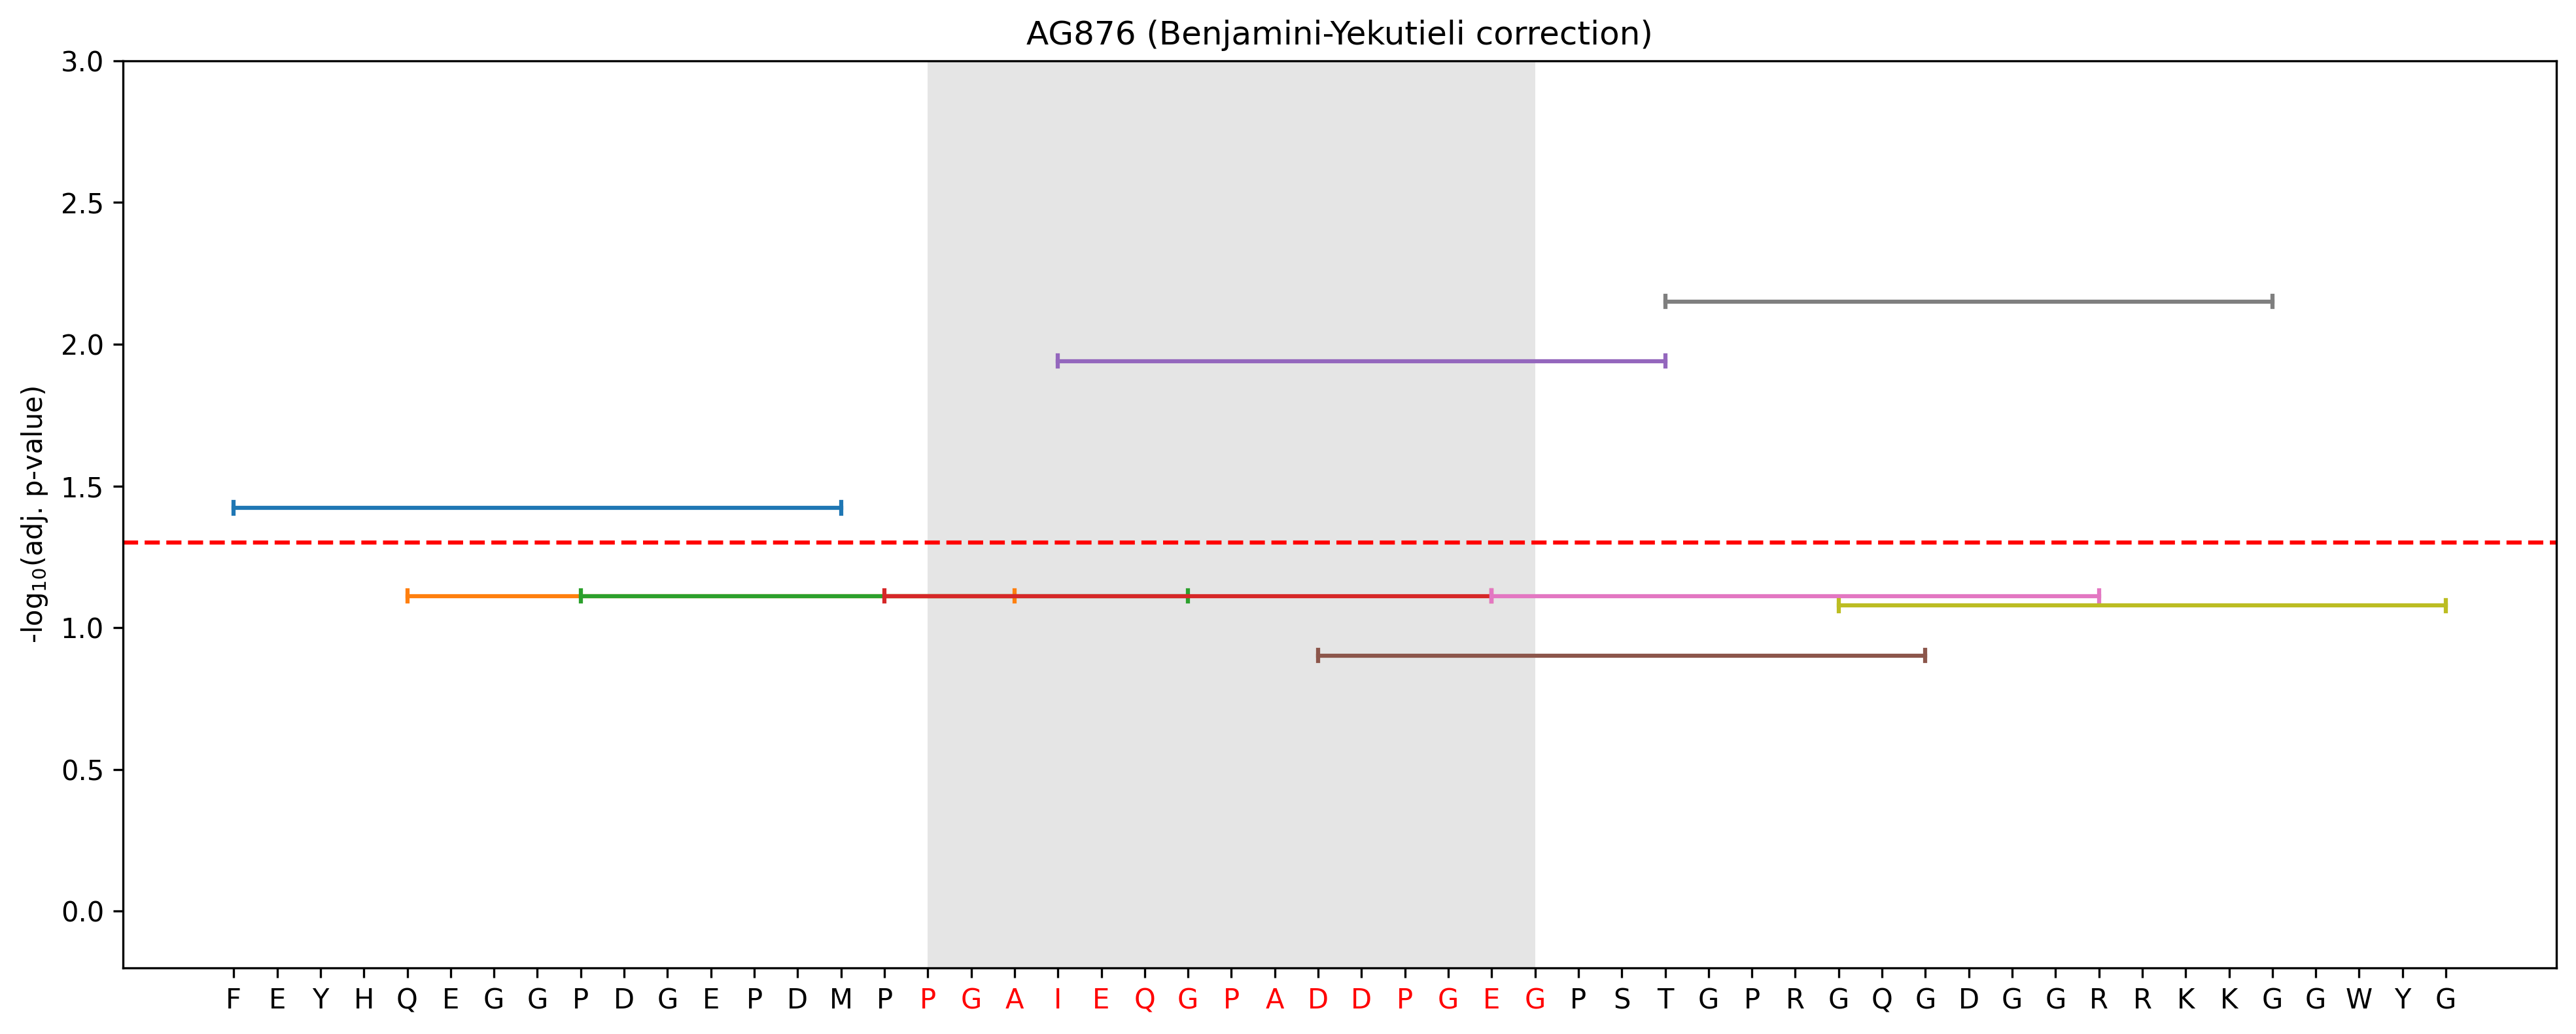

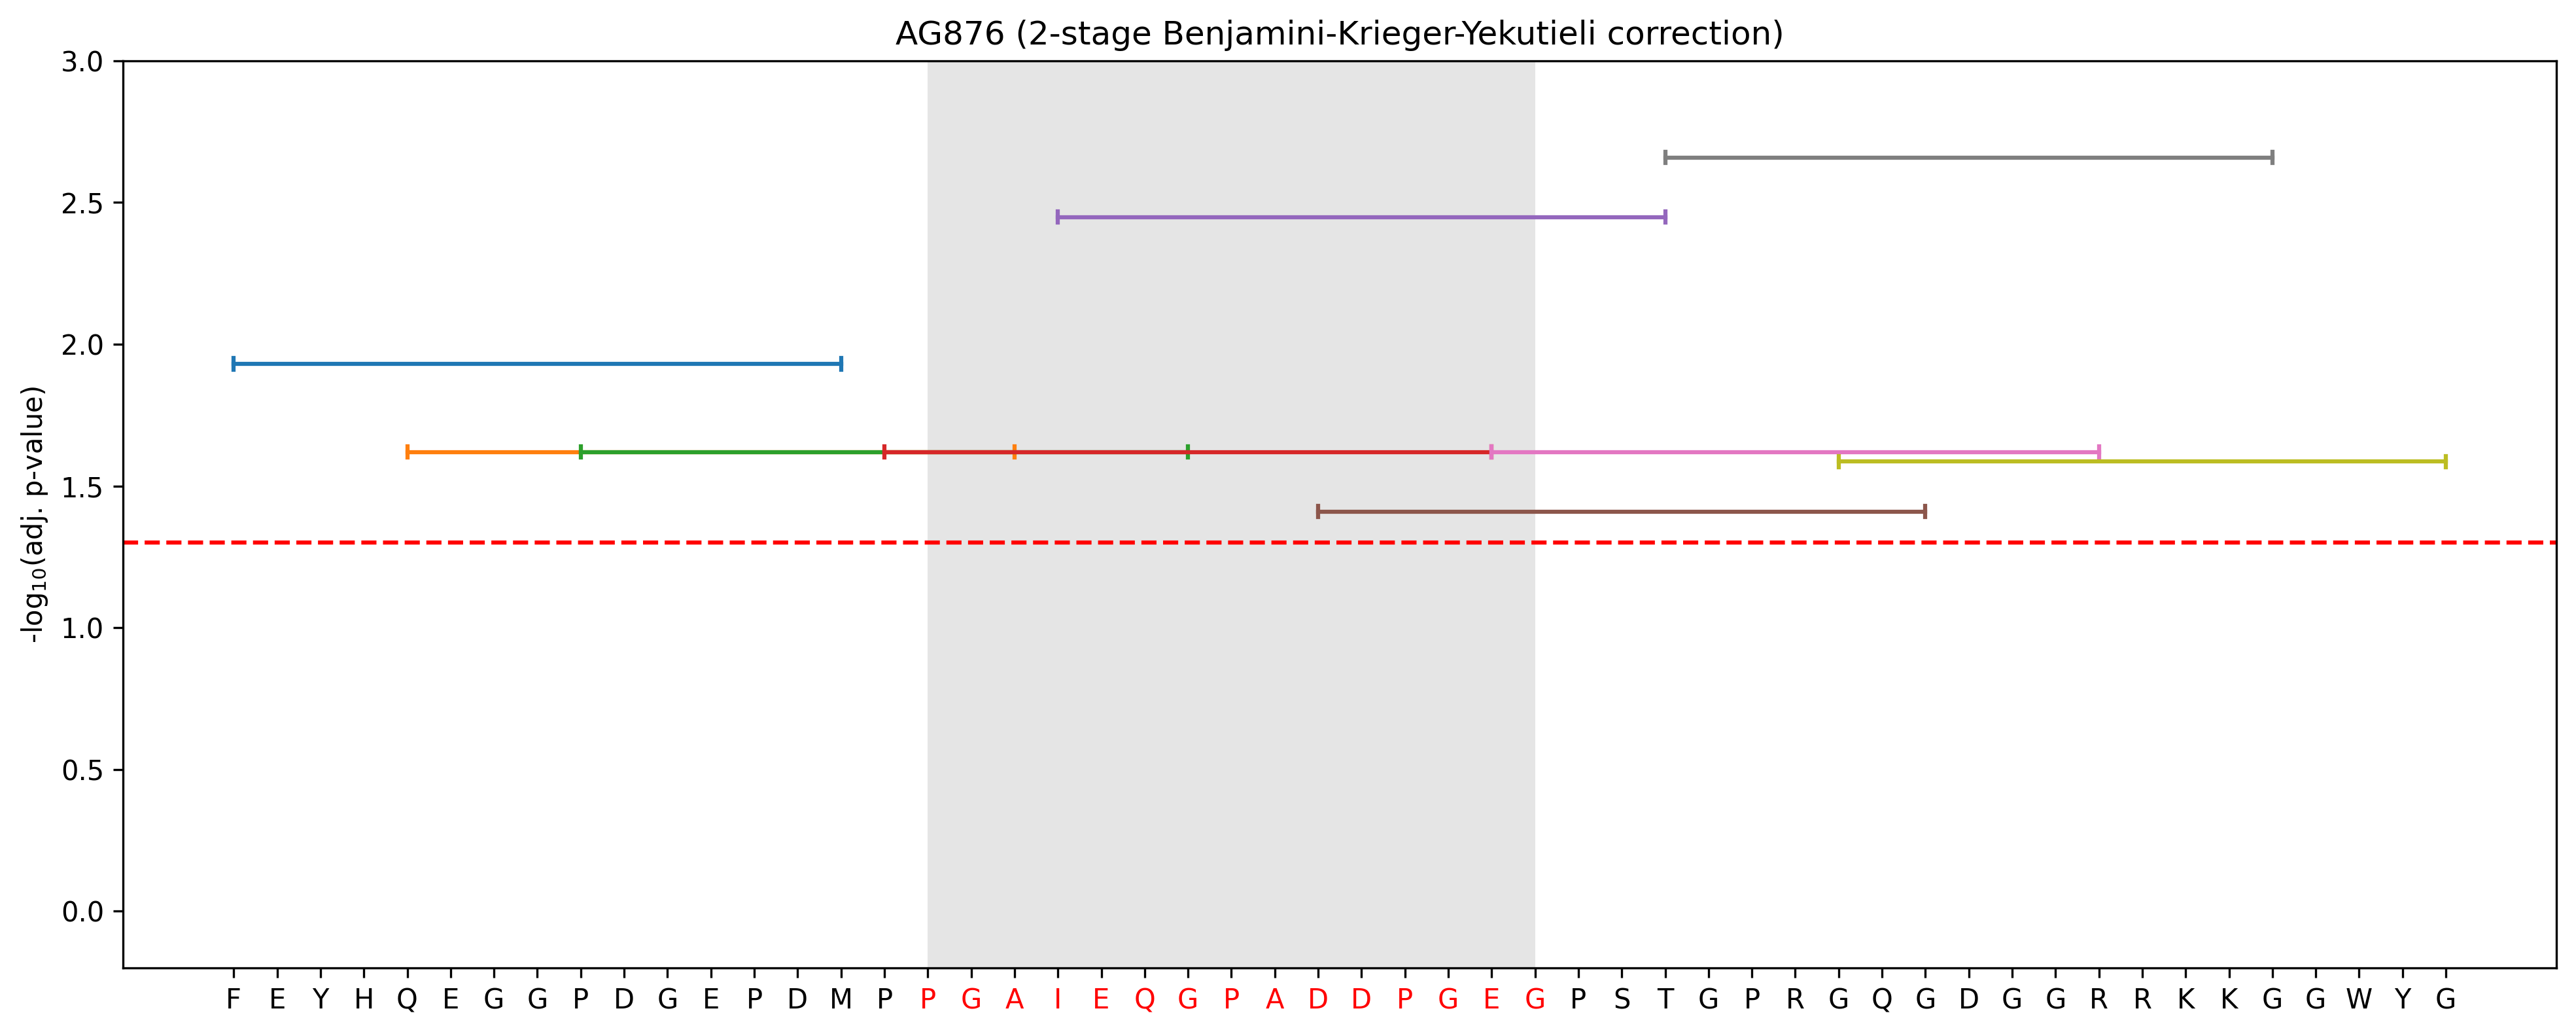

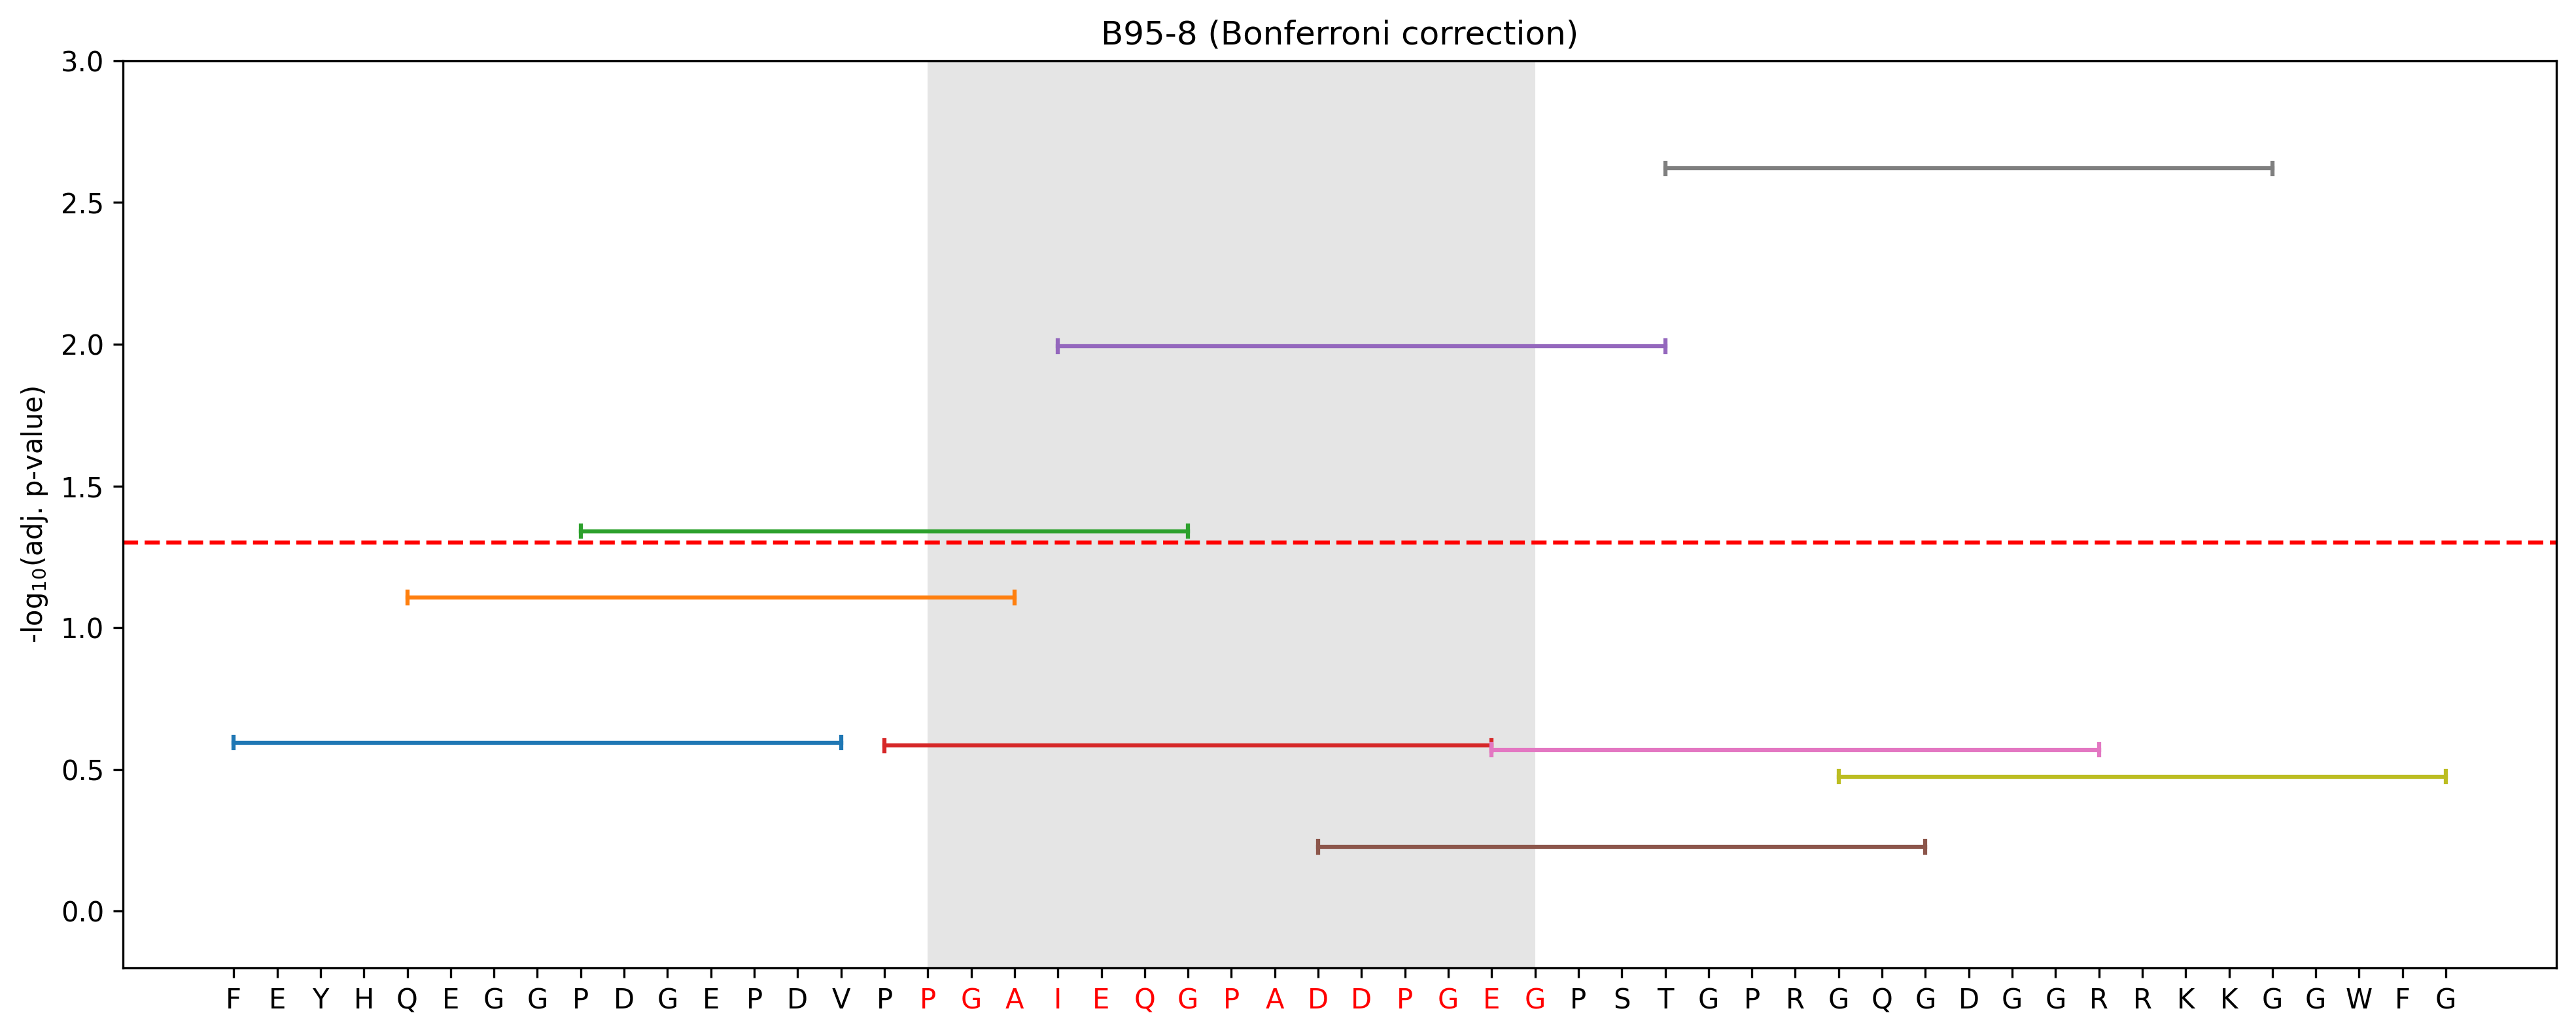

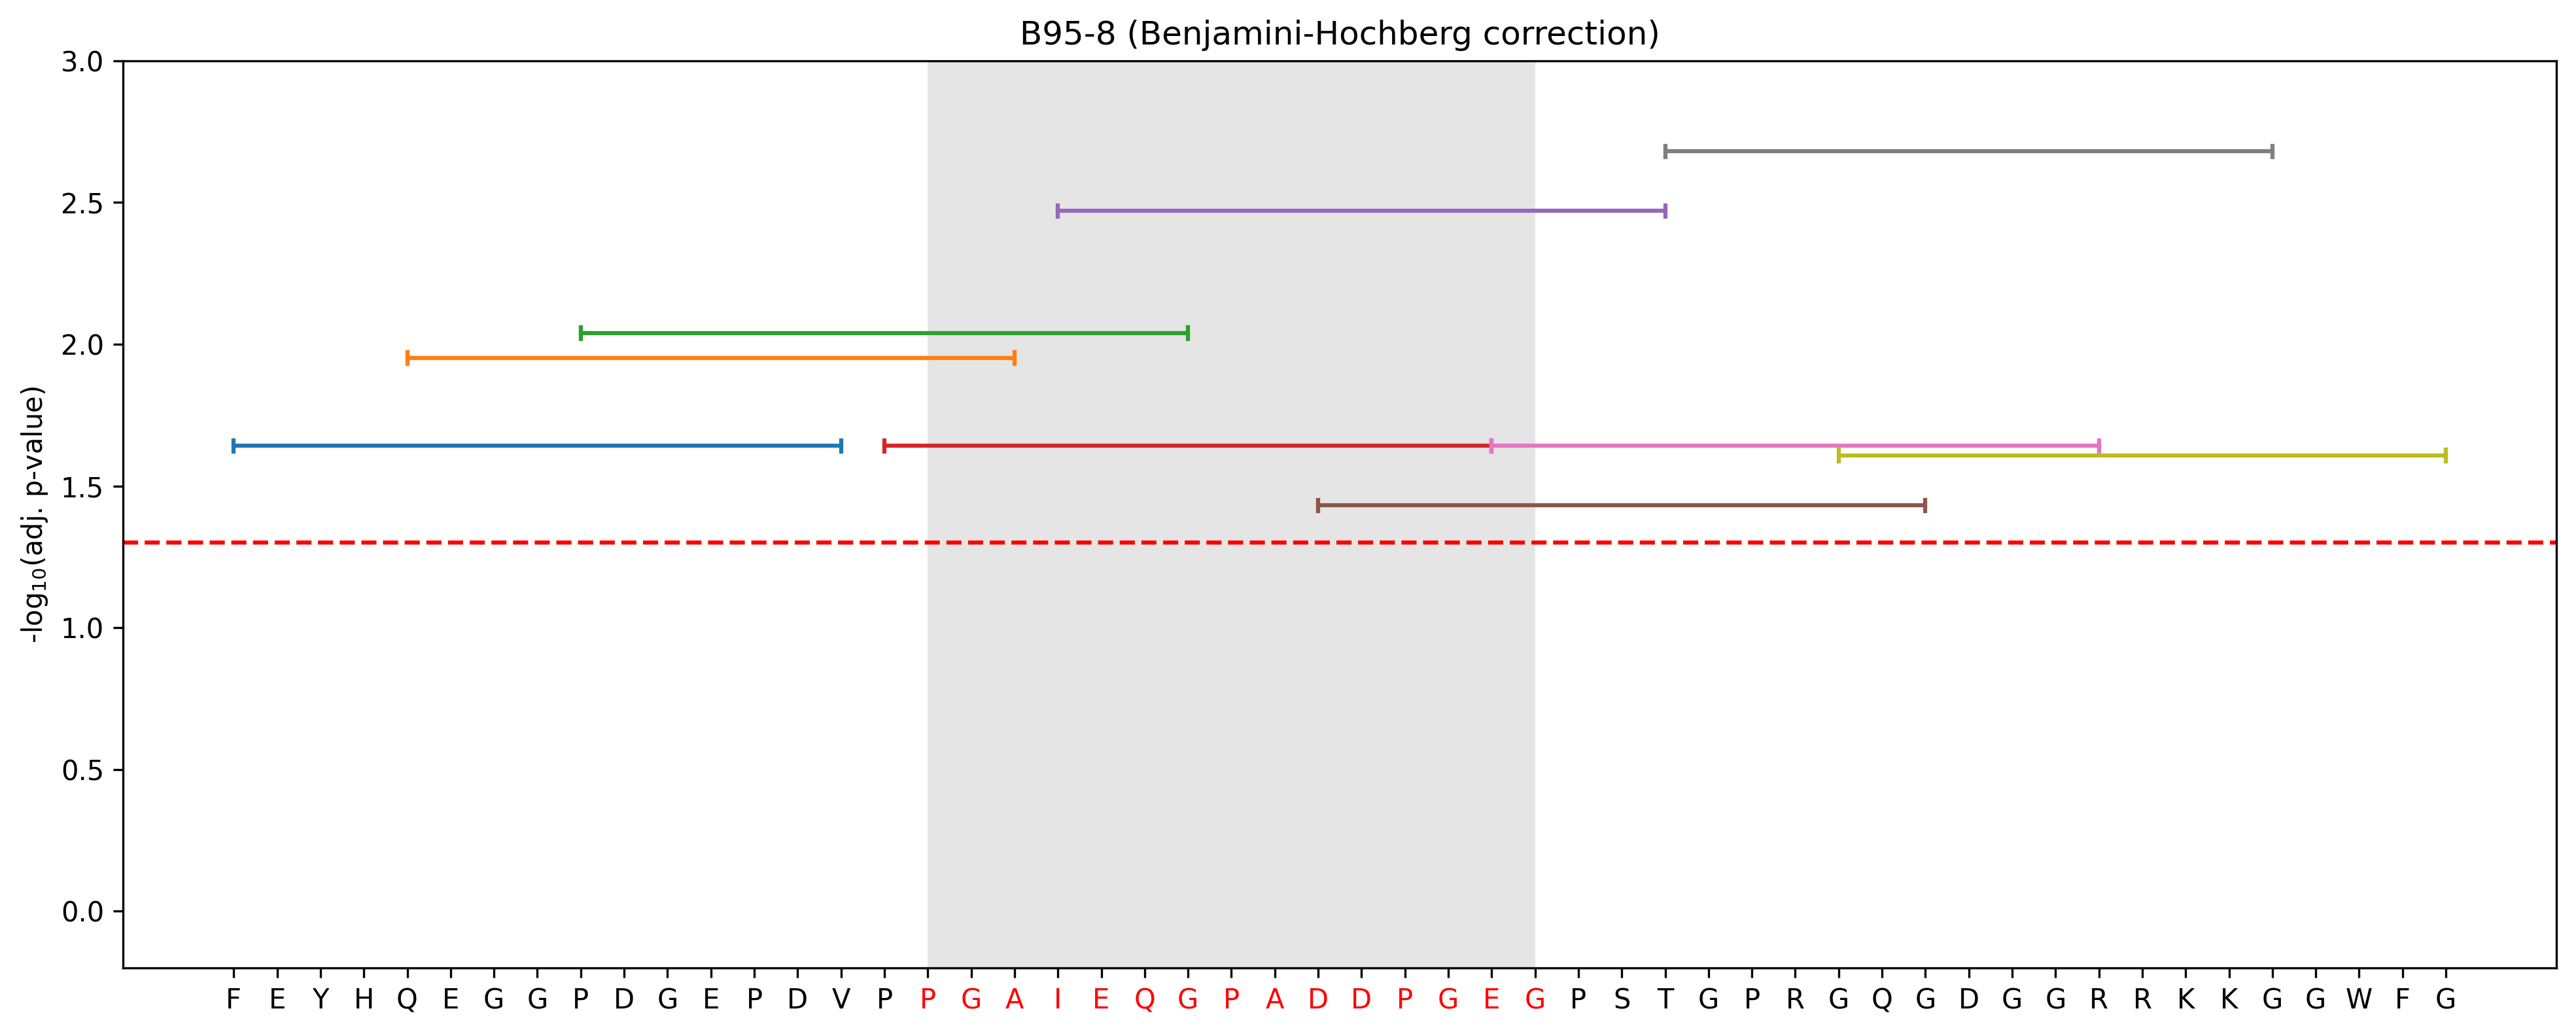

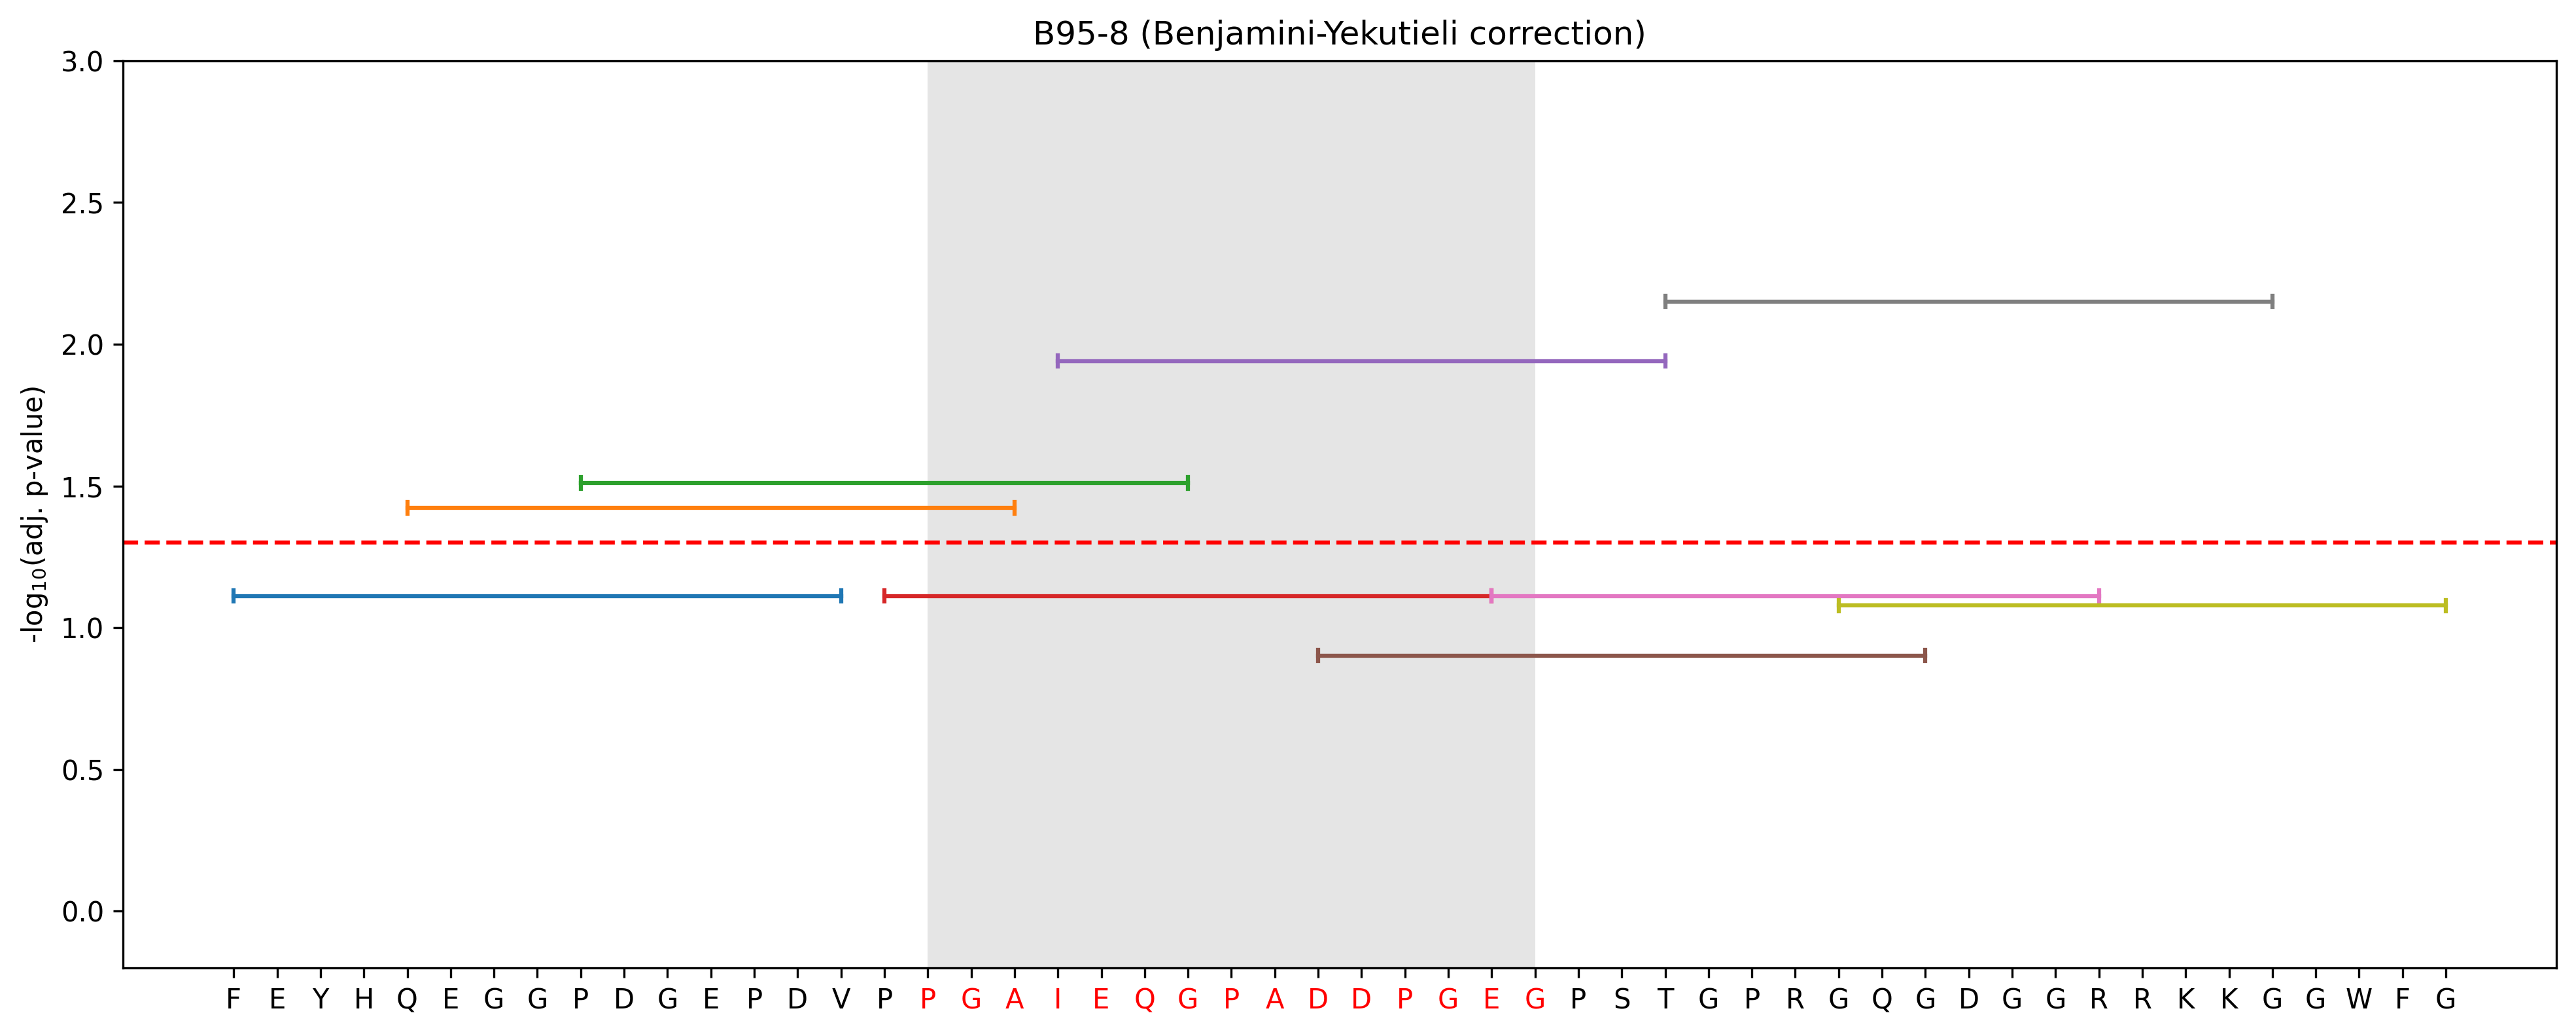

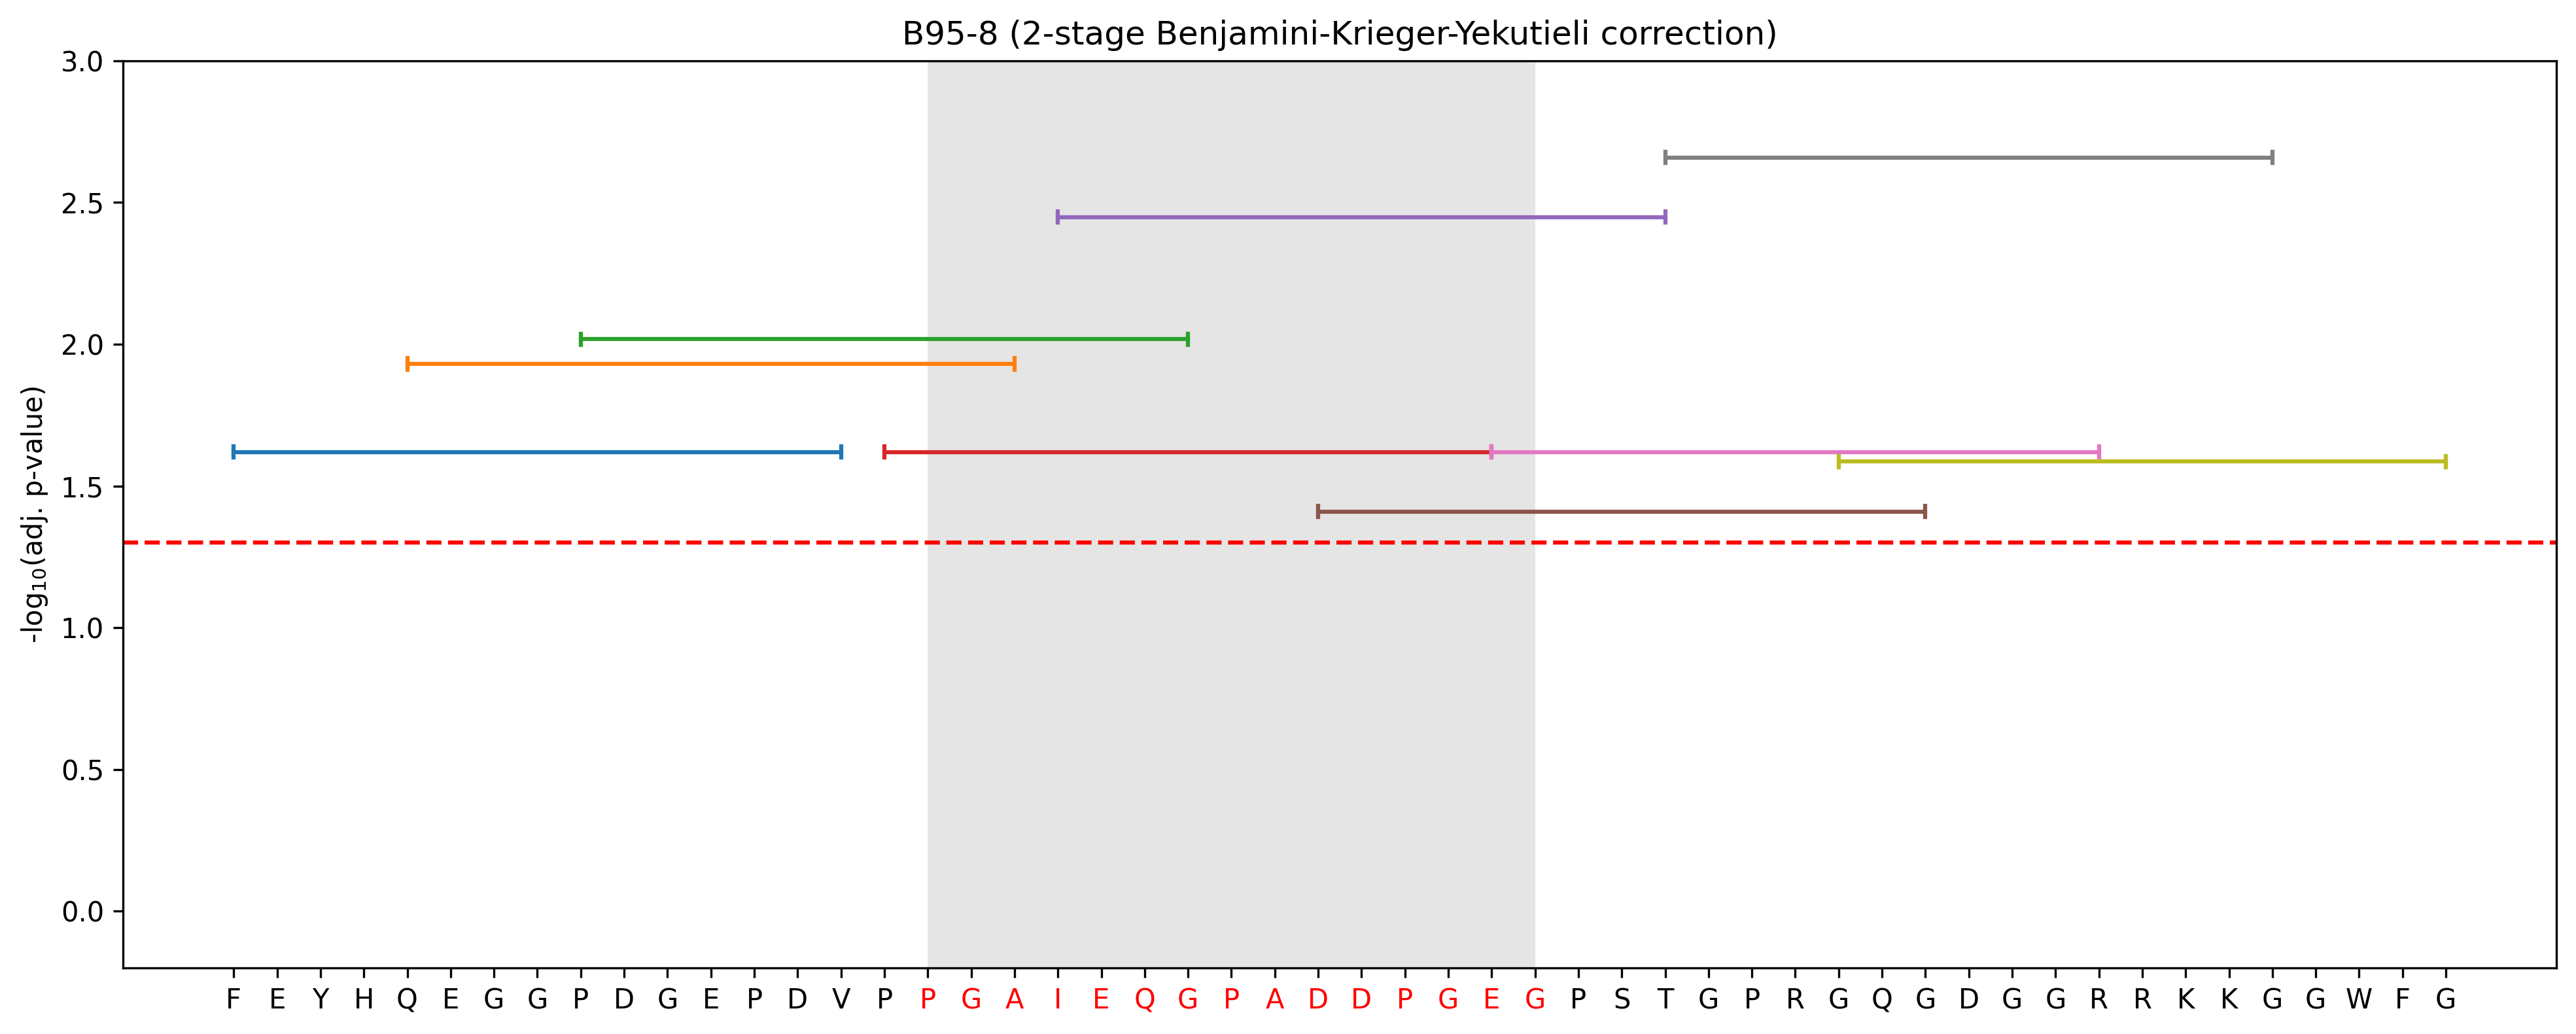

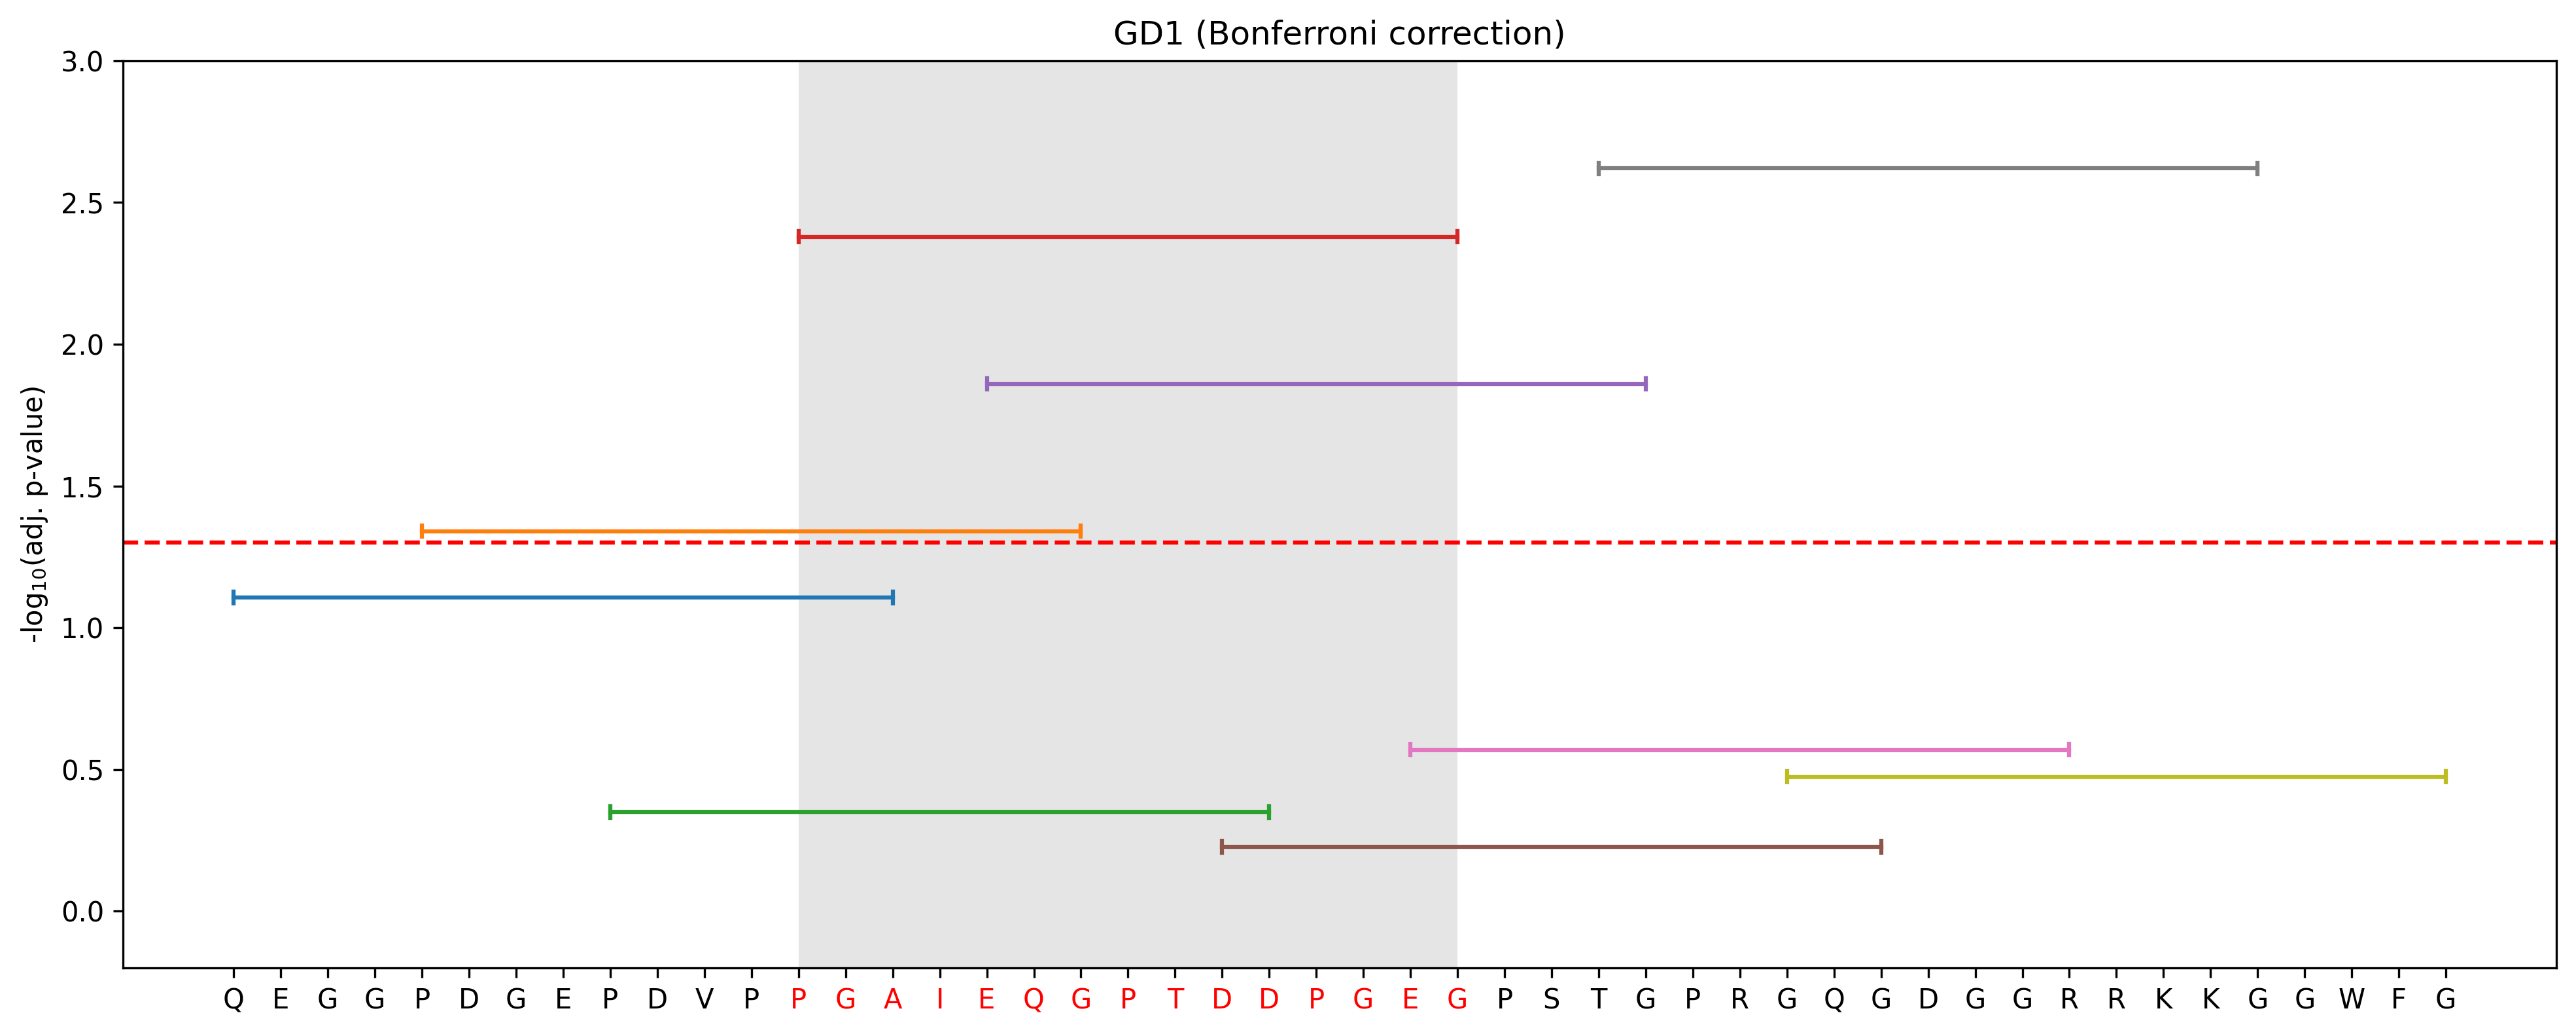

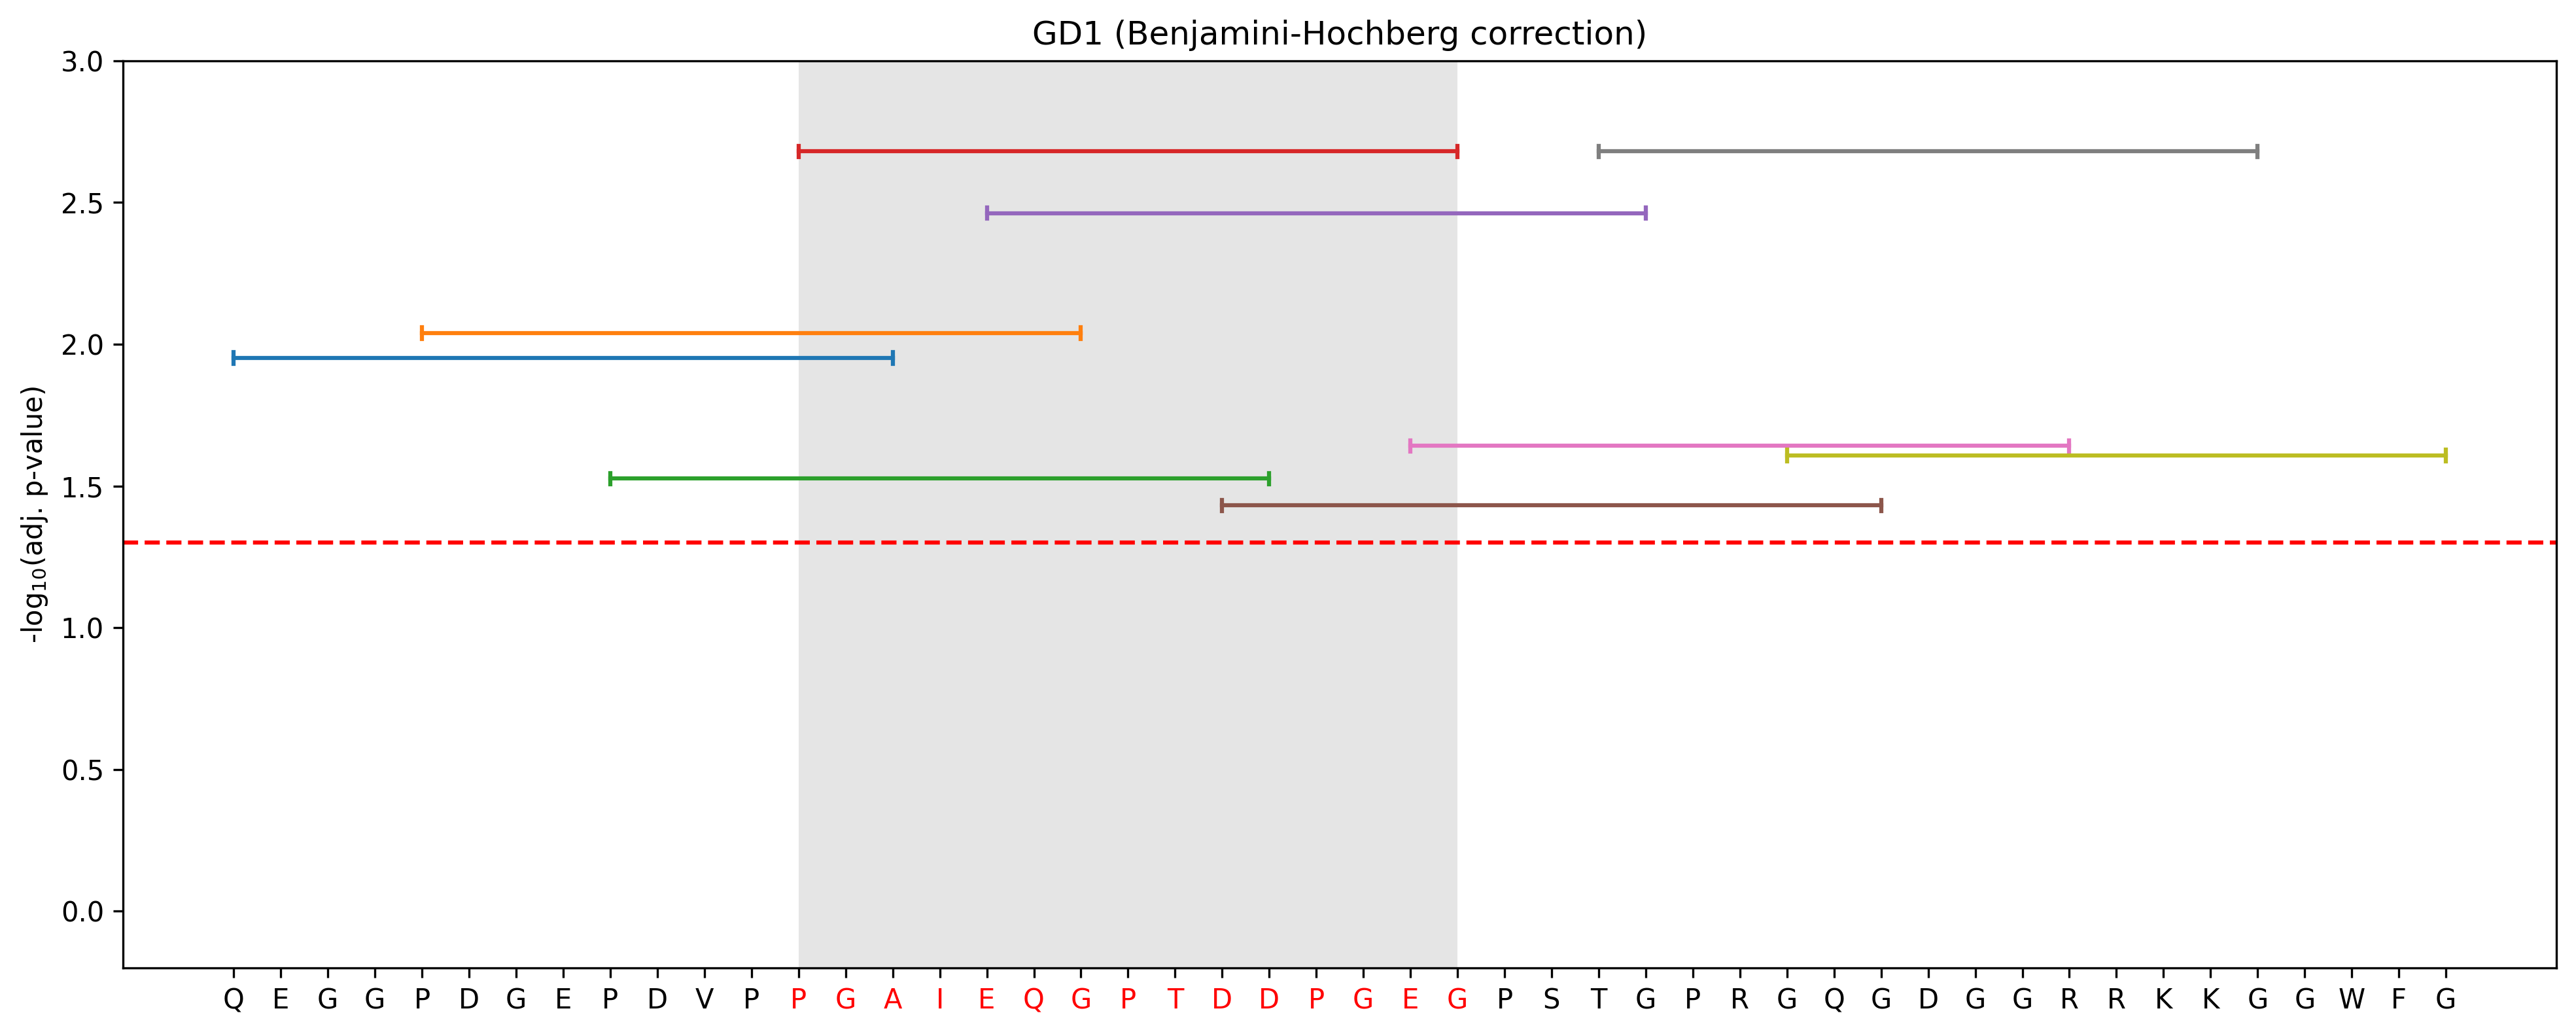

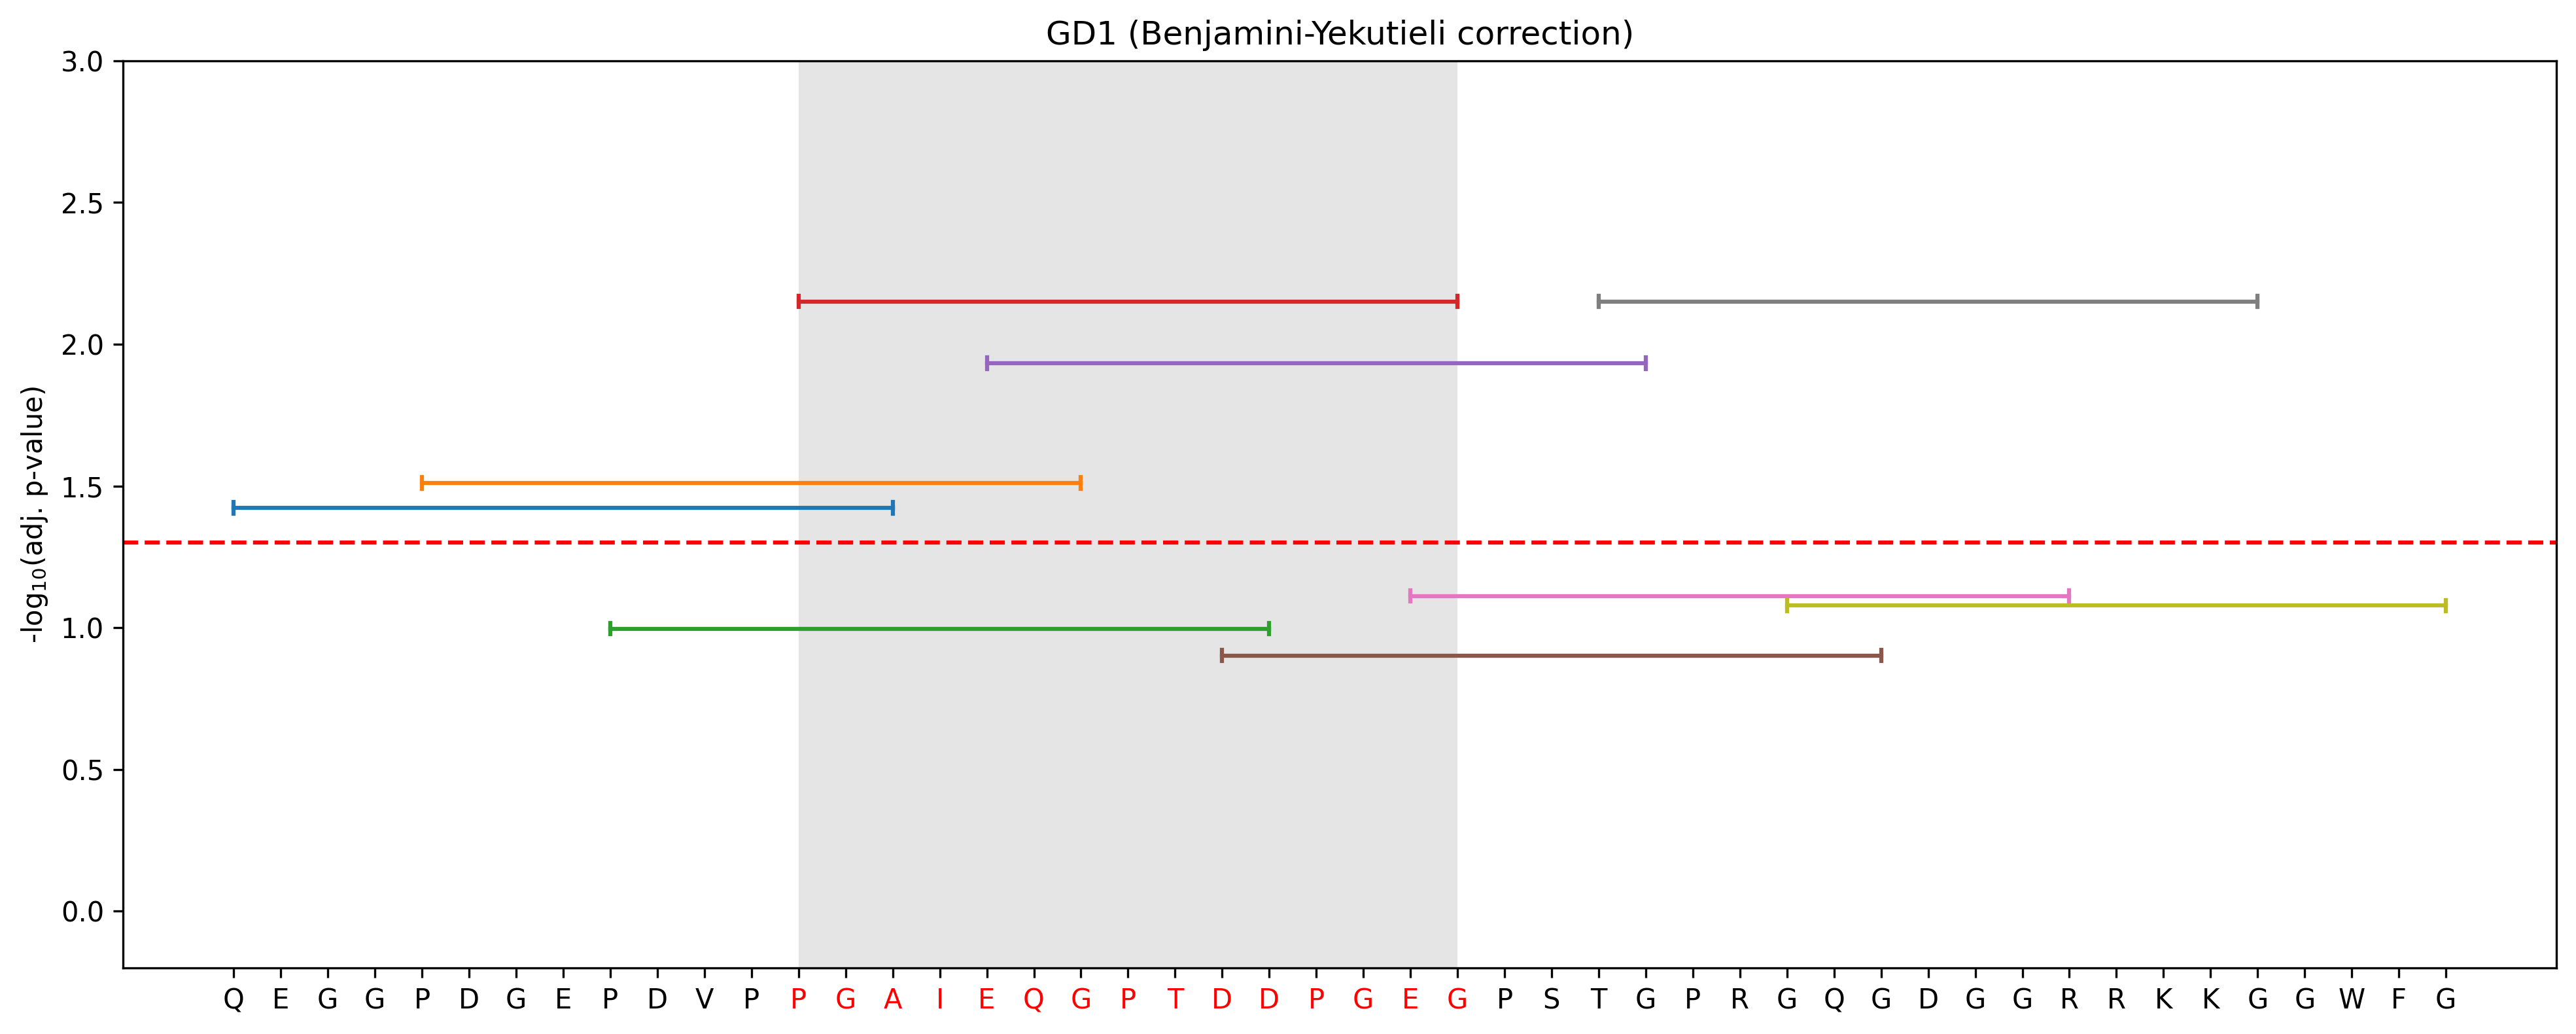

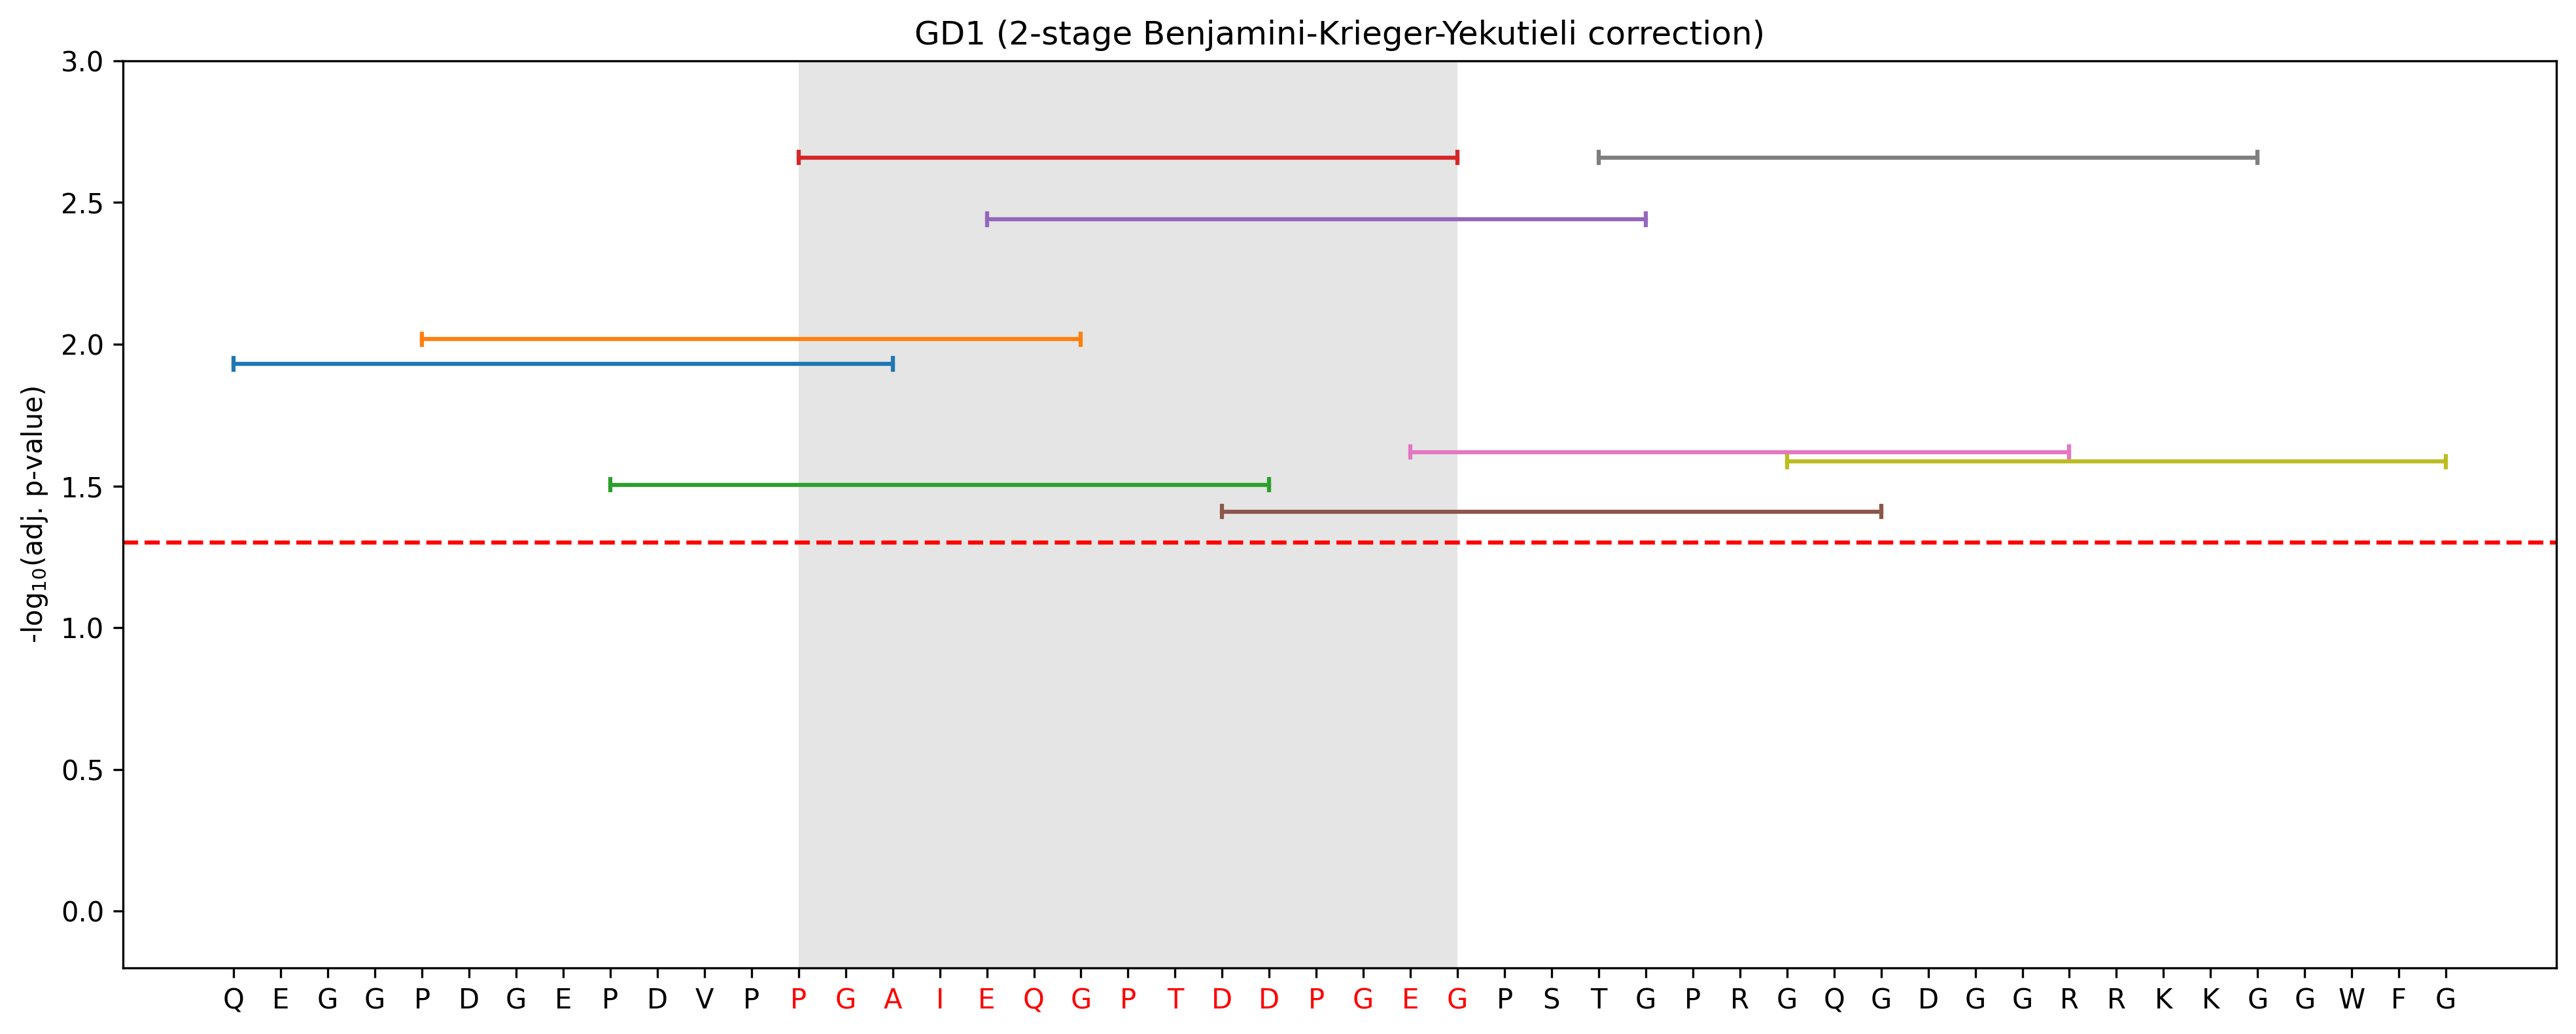

In [26]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])